# **Perbandingan Kinerja Metode Klastering DBSCAN dan KMeans untuk Analisis Indeks Pembangunan Manusia di Pulau Kalimantan, Sulawesi, Nusa Tenggara, Maluku, dan Papua**

**Kelompok 4**
* 22083010003 - Diajeng Sekar Prameswari
* 22083010007 - Intan Adiba
* 22083010015 - Winna Dhestyan Putri
* 22083010018 - Larasati
* 22083010037 - Desi Tristianti
* 22083010042 - Dwi Amalia Putri
* 22083010049 - Datia Putri Nabila Br Tarigan
* 22083010071 - Erika Fatimatul Hidayanti

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score

## **Load Data**
Mengambil data dan kemudian membersihkan nama kolom dengan menghapus karakter newline ('\n').

In [ ]:
url = 'https://drive.google.com/file/d/1E116RNpCU4OhRa7F3Kr1B6yiyb-WFC62/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

df = pd.read_csv(url)
# Remove newline characters from column names
df.columns = [col.replace('\n', '') for col in df.columns]
df

,Provinsi,Kota/Kabupaten,UHH (Tahun),HLS (Tahun),RLS (Tahun),Pengeluaran (Ribu Rupiah),IPM
0,Papua,Papua-Merauke,67.31,14.20,9.04,10.424,71.24
1,Papua,Jayawijaya,60.26,12.83,5.74,7.765,59.60
2,Papua,Jayapura,67.45,14.40,10.27,10.230,72.67
3,Papua,Nabire,68.41,12.44,10.16,9.040,69.91
4,Papua,Kepulauan Yapen,69.39,12.80,9.69,7.685,68.41
...,...,...,...,...,...,...,...
236,Maluku,Seram Bagian Timur,60.06,12.90,8.71,9591.000,65.05
237,Maluku,Maluku Barat Daya,62.98,12.52,8.77,7010.000,63.07
238,Maluku,Buru Selatan,66.69,12.83,8.06,7716.000,65.37
239,Maluku,Ambon,71.00,16.05,12.21,14405.000,81.63


##### **Melakukan df.info() untuk gambaran tentang dataframe dan terlihat jika variabelnya bertipe data object dan float. Kita dapat mengetahui nilai Nan dan jumlah data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Provinsi                   241 non-null    object 
 1   Kota/Kabupaten             241 non-null    object 
 2   UHH (Tahun)                241 non-null    float64
 3   HLS (Tahun)                241 non-null    float64
 4   RLS (Tahun)                241 non-null    float64
 5   Pengeluaran (Ribu Rupiah)  241 non-null    float64
 6   IPM                        241 non-null    float64
dtypes: float64(5), object(2)
memory usage: 13.3+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
#Numeric
numeric = df.loc[:, (df.dtypes == int) | (df.dtypes == float)].columns.tolist()
numeric

['UHH (Tahun)',
 'HLS (Tahun)',
 'RLS (Tahun)',
 'Pengeluaran (Ribu Rupiah)',
 'IPM']

In [ ]:
#Categoric
categoric = df.loc[:, (df.dtypes == object)].columns.tolist()
categoric

['Provinsi', 'Kota/Kabupaten']

In [ ]:
df.describe()

,UHH (Tahun),HLS (Tahun),RLS (Tahun),Pengeluaran (Ribu Rupiah),IPM
count,241.000000,241.000000,241.000000,241.000000,241.000000
mean,68.786639,12.483651,8.618921,8907.508651,68.396888
std,3.287830,1.886402,2.177037,4075.637821,7.169503
min,55.700000,4.070000,1.580000,4.190000,34.100000
25%,66.720000,12.270000,7.560000,7627.000000,65.700000
50%,68.970000,12.850000,8.400000,9425.000000,68.720000
75%,71.200000,13.400000,9.540000,11559.000000,71.930000
max,75.510000,16.900000,16.360000,19850.000000,84.510000


In [ ]:
df.select_dtypes("object").describe()

,Provinsi,Kota/Kabupaten
count,241,241
unique,18,241
top,Papua,Papua-Merauke
freq,29,1


Papua menjadi provinsi dengan jumlah Kota/Kabupaten terbanyak, yaitu 29 Kota/Kabupaten

Plot Distribusi Variabel Numerik

<ipython-input-10-909f9288db97>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numeric[i]], color='orange')
<ipython-input-10-909f9288db97>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numeric[i]], color='orange')
<ipython-input-10-909f9288db97>:4: UserWarning: 

`distplot` is a depr

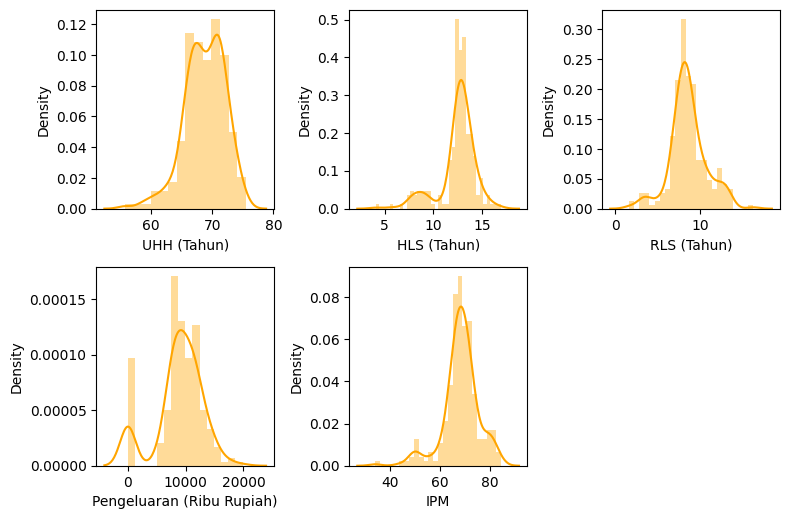

In [ ]:
plt.figure(figsize=(8, 10))
for i in range(0, len(numeric)):
    plt.subplot(4, 3,i+1)
    sns.distplot(df[numeric[i]], color='orange')
    plt.tight_layout()

Interpretasi histogram:
1. UHH (Tahun): Grafik ini menunjukkan
distribusi Umur Harapan Hidup (UHH) dalam tahun. Distribusi ini tampaknya mendekati distribusi normal dengan puncak sekitar 70 tahun. Kebanyakan data berkisar antara 60 hingga 80 tahun.

2. HLS (Tahun): Grafik ini menunjukkan distribusi Harapan Lama Sekolah (HLS) dalam tahun. Distribusi ini juga mendekati distribusi normal dengan puncak di sekitar 12-15 tahun. Kebanyakan data berkisar antara 5 hingga 15 tahun.

3. RLS (Tahun): Grafik ini menunjukkan distribusi Rata-rata Lama Sekolah (RLS) dalam tahun. Distribusi ini memiliki puncak di sekitar 8-10 tahun, dengan sebagian besar data berkisar antara 0 hingga 12 tahun.

4. Pengeluaran (Ribu Rupiah): Grafik ini menunjukkan distribusi pengeluaran dalam ribu Rupiah. Distribusi ini memiliki dua puncak yang signifikan, satu di sekitar 5000-10000 ribu Rupiah dan yang lain di sekitar 15000-20000 ribu Rupiah. Ini menunjukkan adanya dua kelompok pengeluaran yang berbeda dalam data.

5. IPM: Grafik ini menunjukkan distribusi Indeks Pembangunan Manusia (IPM). Distribusi ini mendekati distribusi normal dengan puncak di sekitar 70. Kebanyakan data berkisar antara 40 hingga 80.

Secara umum, grafik-grafik ini menunjukkan bahwa variabel-variabel tersebut memiliki distribusi yang mendekati normal kecuali untuk pengeluaran yang memiliki distribusi bimodal. Hal ini dapat memberikan wawasan tentang karakteristik populasi yang dianalisis, seperti umur harapan hidup, pendidikan, dan tingkat pengeluaran.

Plot Korelasi Antar Variabel

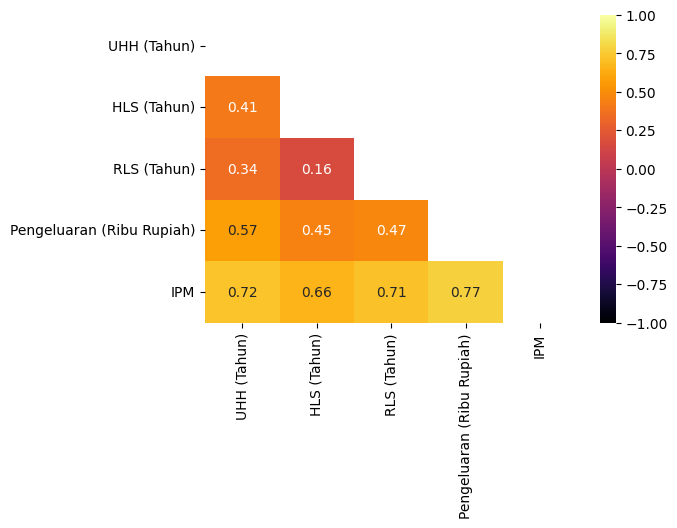

In [ ]:
plt.figure(figsize=(6, 4))
mask=np.triu(np.ones_like(df[numeric].corr(), dtype=bool))
correlation_plot=sns.heatmap(df[numeric].corr(), annot=True, vmax=1, vmin=-1, center=0, cmap='inferno', mask=mask)

Berikut adalah interpretasi dari heatmap ini:

1. UHH (Tahun):

*   Korelasi dengan HLS: 0.41 (hubungan
positif sedang)
*   Korelasi dengan RLS: 0.34 (hubungan positif lemah)
*   Korelasi dengan Pengeluaran: 0.57 (hubungan positif sedang)
*   Korelasi dengan IPM: 0.72 (hubungan positif kuat)



2. HLS (Tahun):
* Korelasi dengan RLS: 0.16 (hubungan positif sangat lemah)
* Korelasi dengan Pengeluaran: 0.45 (hubungan positif sedang)
* Korelasi dengan IPM: 0.66 (hubungan positif kuat)

3. RLS (Tahun):
* Korelasi dengan Pengeluaran: 0.47 (hubungan positif sedang)
* Korelasi dengan IPM: 0.71 (hubungan positif kuat)

4. Pengeluaran (Ribu Rupiah):
* Korelasi dengan IPM: 0.77 (hubungan positif kuat)

Ringkasan:
* Terdapat hubungan yang cukup kuat antara Pengeluaran dengan IPM (0.77), menunjukkan bahwa pengeluaran yang lebih tinggi cenderung berkorelasi dengan nilai IPM yang lebih tinggi.
* Umur Harapan Hidup (UHH) juga memiliki korelasi kuat dengan IPM (0.72), mengindikasikan bahwa umur harapan hidup yang lebih tinggi cenderung berkorelasi dengan nilai IPM yang lebih tinggi.
* Harapan Lama Sekolah (HLS) dan Rata-rata Lama Sekolah (RLS) juga menunjukkan hubungan yang signifikan dengan IPM (0.66 dan 0.71), mengindikasikan bahwa faktor pendidikan berkontribusi signifikan terhadap nilai IPM.
* Pengeluaran menunjukkan hubungan yang cukup signifikan dengan semua variabel lainnya, khususnya dengan UHH (0.57), HLS (0.45), dan RLS (0.47), yang menandakan bahwa tingkat pengeluaran yang lebih tinggi mungkin berhubungan dengan kondisi kesehatan dan pendidikan yang lebih baik.

10 Kota/Kab dengan IPM terkecil

In [ ]:
#membuat data frame antara variabel kabupaten/kota dengan IPM, untuk diambil 10 nilai IPM tertinggi
ipm_kab=pd.DataFrame(df[["Kota/Kabupaten","IPM"]])
ipm_kab["IPM"]=round(ipm_kab["IPM"],4)
ipm_kab10=ipm_kab.sort_values(by="IPM", ascending=True).head(10)
ipm_kab10

,Kota/Kabupaten,IPM
20,Nduga,34.10
24,Puncak,43.87
13,Pegunungan Bintang,47.21
26,Intan Jaya,49.25
22,Mamberamo Tengah,49.25
21,Lanny Jaya,49.62
7,Puncak Jaya,49.84
23,Yalimo,49.90
12,Yahukimo,50.25
27,Deiyai,50.42


10 Kota/Kab dengan IPM Tertinggi

In [ ]:
#membuat data frame antara variabel kabupaten/kota dengan IPM, untuk diambil 10 nilai IPM tertinggi
ipm_kab=pd.DataFrame(df[["Kota/Kabupaten","IPM"]])
ipm_kab["IPM"]=round(ipm_kab["IPM"],4)
ipm_kab10=ipm_kab.sort_values(by="IPM", ascending=False).head(10)
ipm_kab10

,Kota/Kabupaten,IPM
63,Kota Kendari,84.51
187,Kota Denpasar,84.37
86,Makassar,83.12
181,Kab. Badung,82.13
101,Kota Palu,82.02
239,Ambon,81.63
144,Samarinda,81.43
178,Palangka Raya,81.16
143,Balikpapan,81.13
145,Bontang,80.94


<ipython-input-14-2854a6ebe581>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(palette="inferno",ax=ax, x="IPM", y="Kota/Kabupaten", data=ipm_kab10)


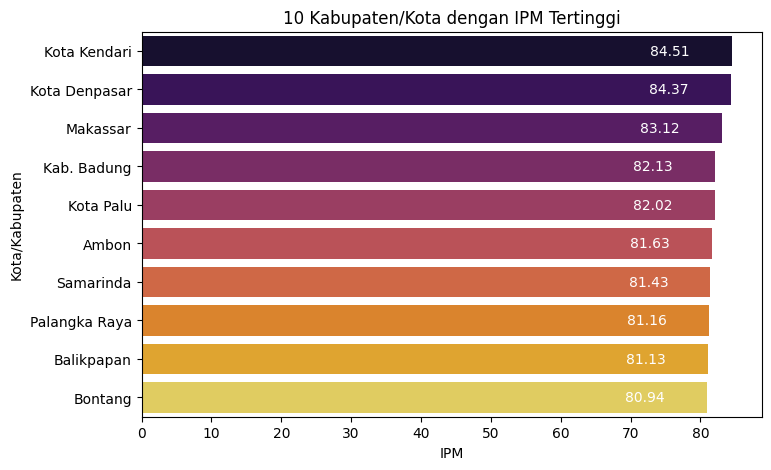

In [ ]:
fig,ax=plt.subplots(figsize=(8,5))
ax=sns.barplot(palette="inferno",ax=ax, x="IPM", y="Kota/Kabupaten", data=ipm_kab10)
plt.title('10 Kabupaten/Kota dengan IPM Tertinggi', fontsize=12)

rects = ax.patches
# Place a label for each bar
for rect in rects:
    # Get X and Y placement of label from rect
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label; change to your liking
    space = -59
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: place label to the left of the bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label to the right
        ha = 'right'

    # Use X value as label and format number
    label = '{:}'.format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at bar end
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords='offset points', # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha,                      # Horizontally align label differently for positive and negative values
        color = 'white')            # Change label color to white

Interpretasi:
* Grafik ini menunjukkan kota/kabupaten di Indonesia dengan kualitas pembangunan manusia terbaik, diukur dengan Indeks Pembangunan Manusia (IPM).
* Kota Kendari memimpin dengan IPM tertinggi, menunjukkan kualitas hidup, pendidikan, dan kesehatan yang sangat baik di daerah tersebut.
* Kota Denpasar dan Makassar juga menunjukkan kualitas pembangunan manusia yang sangat tinggi, dengan nilai IPM di atas 83.
* Secara umum, semua kota/kabupaten yang terdaftar memiliki IPM di atas 80, menandakan bahwa mereka memiliki standar kehidupan yang tinggi dibandingkan daerah lainnya.
* Grafik ini dapat digunakan oleh pembuat kebijakan untuk mengidentifikasi dan belajar dari praktik terbaik yang diterapkan di daerah-daerah dengan IPM tinggi ini, guna meningkatkan kualitas hidup di daerah lain yang mungkin tertinggal.


10 kota/kab dengan uhh terkecil

In [ ]:
#membuat data frame antara variabel kabupaten/kota dengan IPM, untuk diambil 10 nilai IPM tertinggi
uhh_kab=pd.DataFrame(df[["Kota/Kabupaten","UHH (Tahun)"]])
uhh_kab["UHH (Tahun)"]=round(uhh_kab["UHH (Tahun)"],4)
uhh_kab10=uhh_kab.sort_values(by="UHH (Tahun)", ascending=True).head(10)
uhh_kab10

,Kota/Kabupaten,UHH (Tahun)
20,Nduga,55.70
19,Mamberamo Raya,58.29
11,Asmat,58.90
236,Seram Bagian Timur,60.06
1,Jayawijaya,60.26
9,Boven Digoel,60.64
207,Sabu Raijua,60.87
194,Alor,61.99
42,Majene,62.16
235,Seram Bagian Barat,62.25


10 kota/kab dengan uhh terbesar

In [ ]:
#membuat data frame antara variabel kabupaten/kota dengan IPM, untuk diambil 10 nilai IPM tertinggi
uhh_kab=pd.DataFrame(df[["Kota/Kabupaten","UHH (Tahun)"]])
uhh_kab["UHH (Tahun)"]=round(uhh_kab["UHH (Tahun)"],4)
uhh_kab10=uhh_kab.sort_values(by="UHH (Tahun)", ascending=False).head(10)
uhh_kab10

,Kota/Kabupaten,UHH (Tahun)
181,Kab. Badung,75.51
187,Kota Denpasar,75.30
143,Balikpapan,74.78
145,Bontang,74.57
144,Samarinda,74.56
182,Kab. Gianyar,74.13
180,Kab. Tabanan,74.10
164,Tarakan,74.06
147,Bengkayang,74.00
63,Kota Kendari,73.93


10 kota/kab dengan hls terkecil

In [ ]:
#membuat data frame antara variabel kabupaten/kota dengan IPM, untuk diambil 10 nilai IPM tertinggi
hls_kab=pd.DataFrame(df[["Kota/Kabupaten","HLS (Tahun)"]])
hls_kab["HLS (Tahun)"]=round(hls_kab["HLS (Tahun)"],4)
hls_kab10=hls_kab.sort_values(by="HLS (Tahun)", ascending=True).head(10)
hls_kab10

,Kota/Kabupaten,HLS (Tahun)
20,Nduga,4.07
24,Puncak,5.58
13,Pegunungan Bintang,6.59
7,Puncak Jaya,7.50
43,Polewali Mandar,7.60
47,Mamuju Tengah,7.61
26,Intan Jaya,7.67
96,Parigi Moutong,7.77
12,Yahukimo,7.80
93,Donggala,7.98


10 kota/kab dengan hls terbesar

In [ ]:
#membuat data frame antara variabel kabupaten/kota dengan IPM, untuk diambil 10 nilai IPM tertinggi
hls_kab=pd.DataFrame(df[["Kota/Kabupaten","HLS (Tahun)"]])
hls_kab["HLS (Tahun)"]=round(hls_kab["HLS (Tahun)"],4)
hls_kab10=hls_kab.sort_values(by="HLS (Tahun)", ascending=False).head(10)
hls_kab10

,Kota/Kabupaten,HLS (Tahun)
63,Kota Kendari,16.90
209,Kota Kupang,16.43
239,Ambon,16.05
228,Ternate,15.76
218,Kota Mataram,15.65
86,Makassar,15.59
64,Kota Baubau,15.18
88,Palopo,15.10
144,Samarinda,15.10
219,Kota Bima,15.05


10 kota/kab dengan rls terkecil

In [ ]:
#membuat data frame antara variabel kabupaten/kota dengan IPM, untuk diambil 10 nilai IPM tertinggi
rls_kab=pd.DataFrame(df[["Kota/Kabupaten","RLS (Tahun)"]])
rls_kab["RLS (Tahun)"]=round(rls_kab["RLS (Tahun)"],4)
rls_kab10=rls_kab.sort_values(by="RLS (Tahun)", ascending=True).head(10)
rls_kab10

,Kota/Kabupaten,RLS (Tahun)
20,Nduga,1.58
24,Puncak,2.17
23,Yalimo,3.19
13,Pegunungan Bintang,3.23
26,Intan Jaya,3.26
27,Deiyai,3.26
22,Mamberamo Tengah,3.48
21,Lanny Jaya,3.59
14,Tolikara,3.67
7,Puncak Jaya,4.03


10 kota/kab dengan rls terbesar

In [ ]:
#membuat data frame antara variabel kabupaten/kota dengan IPM, untuk diambil 10 nilai IPM tertinggi
rls_kab=pd.DataFrame(df[["Kota/Kabupaten","RLS (Tahun)"]])
rls_kab["RLS (Tahun)"]=round(rls_kab["RLS (Tahun)"],4)
rls_kab10=rls_kab.sort_values(by="RLS (Tahun)", ascending=False).head(10)
rls_kab10

,Kota/Kabupaten,RLS (Tahun)
101,Kota Palu,16.36
92,Poso,13.72
42,Majene,13.63
43,Polewali Mandar,13.39
91,Morowali,13.36
90,Banggai,13.34
45,Mamuju,13.25
95,Buol,13.17
89,Banggai Kepulauan,13.08
99,Banggai Laut,13.02


10 kota/kab dengan pengeluaran terendah

In [ ]:
#membuat data frame antara variabel kabupaten/kota dengan IPM, untuk diambil 10 nilai IPM tertinggi
p_kab=pd.DataFrame(df[["Kota/Kabupaten","Pengeluaran (Ribu Rupiah)"]])
p_kab["Pengeluaran (Ribu Rupiah)"]=round(p_kab["Pengeluaran (Ribu Rupiah)"],4)
p_kab10=p_kab.sort_values(by="Pengeluaran (Ribu Rupiah)", ascending=True).head(10)
p_kab10

,Kota/Kabupaten,Pengeluaran (Ribu Rupiah)
20,Nduga,4.190
21,Lanny Jaya,4.559
22,Mamberamo Tengah,4.630
23,Yalimo,4.802
19,Mamberamo Raya,4.806
27,Deiyai,4.808
14,Tolikara,5.079
12,Yahukimo,5.101
7,Puncak Jaya,5.422
24,Puncak,5.583


10 kota/kab dengan pengeluaran terbesar

In [ ]:
#membuat data frame antara variabel kabupaten/kota dengan IPM, untuk diambil 10 nilai IPM tertinggi
p_kab=pd.DataFrame(df[["Kota/Kabupaten","Pengeluaran (Ribu Rupiah)"]])
p_kab["Pengeluaran (Ribu Rupiah)"]=round(p_kab["Pengeluaran (Ribu Rupiah)"],4)
p_kab10=p_kab.sort_values(by="Pengeluaran (Ribu Rupiah)", ascending=False).head(10)
p_kab10

,Kota/Kabupaten,Pengeluaran (Ribu Rupiah)
187,Kota Denpasar,19850.0
181,Kab. Badung,17445.0
86,Makassar,17406.0
145,Bontang,17327.0
143,Balikpapan,15455.0
218,Kota Mataram,15416.0
101,Kota Palu,15162.0
144,Samarinda,15162.0
158,Kota Pontianak,15141.0
134,KOTA BANJARMASIN,14770.0


**Pengelompokkan IPM**


* **IPM < 60, rendah,**
* **60 ≤ IPM <70, sedang,**
* **70 ≤ IPM < 80, tinggi**
* **IPM ≥ 80 sangat tinggi**




In [ ]:
# Fungsi untuk mengelompokkan nilai IPM
def kelompokkan_ipm(ipm):
    if ipm < 60:
        return "Rendah"
    elif 60 <= ipm < 70:
        return "Sedang"
    elif 70 <= ipm < 80:
        return "Tinggi"
    elif ipm >= 80:
        return "Sangat Tinggi"
    else:
        return "Tidak Valid"

# Mengaplikasikan fungsi pengelompokan ke kolom 'IPM' dan menambahkan kolom baru 'Kategori IPM'
df['Kategori IPM'] = df['IPM'].apply(kelompokkan_ipm)

# Menampilkan DataFrame dengan kolom baru
df

,Provinsi,Kota/Kabupaten,UHH (Tahun),HLS (Tahun),RLS (Tahun),Pengeluaran (Ribu Rupiah),IPM,Kategori IPM
0,Papua,Papua-Merauke,67.31,14.20,9.04,10.424,71.24,Tinggi
1,Papua,Jayawijaya,60.26,12.83,5.74,7.765,59.60,Rendah
2,Papua,Jayapura,67.45,14.40,10.27,10.230,72.67,Tinggi
3,Papua,Nabire,68.41,12.44,10.16,9.040,69.91,Sedang
4,Papua,Kepulauan Yapen,69.39,12.80,9.69,7.685,68.41,Sedang
...,...,...,...,...,...,...,...,...
236,Maluku,Seram Bagian Timur,60.06,12.90,8.71,9591.000,65.05,Sedang
237,Maluku,Maluku Barat Daya,62.98,12.52,8.77,7010.000,63.07,Sedang
238,Maluku,Buru Selatan,66.69,12.83,8.06,7716.000,65.37,Sedang
239,Maluku,Ambon,71.00,16.05,12.21,14405.000,81.63,Sangat Tinggi


In [ ]:
# Mengelompokkan berdasarkan kategori IPM
grouped = df.groupby('Kategori IPM')['Kota/Kabupaten'].apply(list)

# Menampilkan hasil
for kategori, kota_kabupaten in grouped.items():
    print(f"{kategori}: {kota_kabupaten}")

Rendah: ['Jayawijaya', 'Paniai', 'Puncak Jaya', 'Mappi', 'Asmat', 'Yahukimo', 'Pegunungan Bintang', 'Tolikara', 'Mamberamo Raya', 'Nduga', 'Lanny Jaya', 'Mamberamo Tengah', 'Yalimo', 'Puncak', 'Dogiyai', 'Intan Jaya', 'Deiyai', 'Tambrauw', 'Pegunungan Arfak', 'Sabu Raijua']
Sangat Tinggi: ['Kota Jayapura', 'Kota Kendari', 'Makassar', 'Kota Palu', 'Balikpapan', 'Samarinda', 'Bontang', 'Kota Pontianak', 'Palangka Raya', 'Kab. Badung', 'Kota Denpasar', 'Kota Kupang', 'Ternate', 'Ambon']
Sedang: ['Nabire', 'Kepulauan Yapen', 'Boven Digoel', 'Sarmi', 'Keerom', 'Waropen', 'Supiori', 'Fakfak', 'Kaimana', 'Teluk Wondama', 'Teluk Bintuni', 'Sorong Selatan', 'Sorong', 'Raja Ampat', 'Maybrat', 'Manokwari Selatan', 'Majene', 'Polewali Mandar', 'Mamasa', 'Mamuju', 'Pasangkayu', 'Mamuju Tengah', 'Buton', 'Muna', 'Konawe Selatan', 'Bombana', 'Buton Utara', 'Kolaka Timur', 'Konawe Kepulauan', 'Muna Barat', 'Buton Tengah', 'Buton Selatan', 'Kepulauan Selayar', 'Bantaeng', 'Jeneponto', 'Takalar', 'Sinja

In [ ]:
# Mengelompokkan berdasarkan kategori IPM
grouped = df.groupby('Kategori IPM')['Kota/Kabupaten'].apply(lambda x: ', '.join(x))

# Menampilkan hasil
for kategori, kota_kabupaten in grouped.items():
    print(f"{kategori}: {kota_kabupaten}")

Rendah: Jayawijaya, Paniai, Puncak Jaya, Mappi, Asmat, Yahukimo, Pegunungan Bintang, Tolikara, Mamberamo Raya, Nduga, Lanny Jaya, Mamberamo Tengah, Yalimo, Puncak, Dogiyai, Intan Jaya, Deiyai, Tambrauw, Pegunungan Arfak, Sabu Raijua
Sangat Tinggi: Kota Jayapura, Kota Kendari, Makassar, Kota Palu, Balikpapan, Samarinda, Bontang, Kota Pontianak, Palangka Raya, Kab. Badung, Kota Denpasar, Kota Kupang, Ternate, Ambon
Sedang: Nabire, Kepulauan Yapen, Boven Digoel, Sarmi, Keerom, Waropen, Supiori, Fakfak, Kaimana, Teluk Wondama, Teluk Bintuni, Sorong Selatan, Sorong, Raja Ampat, Maybrat, Manokwari Selatan, Majene, Polewali Mandar, Mamasa, Mamuju, Pasangkayu, Mamuju Tengah, Buton, Muna, Konawe Selatan, Bombana, Buton Utara, Kolaka Timur, Konawe Kepulauan, Muna Barat, Buton Tengah, Buton Selatan, Kepulauan Selayar, Bantaeng, Jeneponto, Takalar, Sinjai, Pangkajene dan Kepulauan, Bone, Soppeng, Tana Toraja, Banggai Kepulauan, Donggala, Tolitoli, Buol, Parigi Moutong, Tojo Una-una, Sigi, Banggai 

In [ ]:
# Menghitung banyaknya tiap kategori dalam cluster 1
kategori_counts = df['Kategori IPM'].value_counts()

# Menampilkan hasil
print("Banyaknya tiap kategori :")
print(kategori_counts)

Banyaknya tiap kategori :
Kategori IPM
Sedang           130
Tinggi            77
Rendah            20
Sangat Tinggi     14
Name: count, dtype: int64


Terlihat jika hasil korelasi antar variabel memiliki korelasi rendah dan yang paling tinggi hanya di angka

In [ ]:
# 10 Kota/Kabupaten dengan tingkat UHH tertinggi
top10_UHH = df.nlargest(10, 'UHH (Tahun)')[['Provinsi', 'Kota/Kabupaten', 'UHH (Tahun)', 'Kategori IPM']]
# 10 Kota/Kabupaten dengan tingkat UHH terendah
bottom10_UHH = df.nsmallest(10, 'UHH (Tahun)')[['Provinsi', 'Kota/Kabupaten', 'UHH (Tahun)', 'Kategori IPM']]

print("\n 10 Kota/Kabupaten dengan Tingkat Usia Harapan Hidup Tertinggi: ")
display(top10_UHH)
print("\n10 Kota/Kabupaten dengan Tingkat Usia Harapan Hidup Terendah :")
display(bottom10_UHH)


 10 Kota/Kabupaten dengan Tingkat Usia Harapan Hidup Tertinggi: 


,Provinsi,Kota/Kabupaten,UHH (Tahun),Kategori IPM
181,Bali,Kab. Badung,75.51,Sangat Tinggi
187,Bali,Kota Denpasar,75.30,Sangat Tinggi
143,Kalimantan Timur,Balikpapan,74.78,Sangat Tinggi
145,Kalimantan Timur,Bontang,74.57,Sangat Tinggi
144,Kalimantan Timur,Samarinda,74.56,Sangat Tinggi
182,Bali,Kab. Gianyar,74.13,Tinggi
180,Bali,Kab. Tabanan,74.10,Tinggi
164,Kalimantan Utara,Tarakan,74.06,Tinggi
147,Kalimantan Barat,Bengkayang,74.00,Sedang
63,Sulawesi Tenggara,Kota Kendari,73.93,Sangat Tinggi



10 Kota/Kabupaten dengan Tingkat Usia Harapan Hidup Terendah :


,Provinsi,Kota/Kabupaten,UHH (Tahun),Kategori IPM
20,Papua,Nduga,55.70,Rendah
19,Papua,Mamberamo Raya,58.29,Rendah
11,Papua,Asmat,58.90,Rendah
236,Maluku,Seram Bagian Timur,60.06,Sedang
1,Papua,Jayawijaya,60.26,Rendah
9,Papua,Boven Digoel,60.64,Sedang
207,NTT,Sabu Raijua,60.87,Rendah
194,NTT,Alor,61.99,Sedang
42,Sulawesi Barat,Majene,62.16,Sedang
235,Maluku,Seram Bagian Barat,62.25,Sedang


In [ ]:
# 10 Kota/Kabupaten dengan tingkat HLS tertinggi
top10_HLS = df.nlargest(10, 'HLS (Tahun)')[['Provinsi', 'Kota/Kabupaten', 'HLS (Tahun)', 'Kategori IPM']]
# 10 Kota/Kabupaten dengan tingkat HLS terendah
bottom10_HLS = df.nsmallest(10, 'HLS (Tahun)')[['Provinsi', 'Kota/Kabupaten', 'HLS (Tahun)', 'Kategori IPM']]

print("\n 10 Kota/Kabupaten dengan Tingkat Harapan Lama Sekolah Tertinggi: ")
display(top10_HLS)
print("\n10 Kota/Kabupaten dengan Tingkat Harapan Lama Sekolah Terendah :")
display(bottom10_HLS)


 10 Kota/Kabupaten dengan Tingkat Harapan Lama Sekolah Tertinggi: 


,Provinsi,Kota/Kabupaten,HLS (Tahun),Kategori IPM
63,Sulawesi Tenggara,Kota Kendari,16.90,Sangat Tinggi
209,NTT,Kota Kupang,16.43,Sangat Tinggi
239,Maluku,Ambon,16.05,Sangat Tinggi
228,Maluku Utara,Ternate,15.76,Sangat Tinggi
218,NTB,Kota Mataram,15.65,Tinggi
86,Sulawesi Selatan,Makassar,15.59,Sangat Tinggi
64,Sulawesi Tenggara,Kota Baubau,15.18,Tinggi
88,Sulawesi Selatan,Palopo,15.10,Tinggi
144,Kalimantan Timur,Samarinda,15.10,Sangat Tinggi
219,NTB,Kota Bima,15.05,Tinggi



10 Kota/Kabupaten dengan Tingkat Harapan Lama Sekolah Terendah :


,Provinsi,Kota/Kabupaten,HLS (Tahun),Kategori IPM
20,Papua,Nduga,4.07,Rendah
24,Papua,Puncak,5.58,Rendah
13,Papua,Pegunungan Bintang,6.59,Rendah
7,Papua,Puncak Jaya,7.50,Rendah
43,Sulawesi Barat,Polewali Mandar,7.60,Sedang
47,Sulawesi Barat,Mamuju Tengah,7.61,Sedang
26,Papua,Intan Jaya,7.67,Rendah
96,Sulawesi Tengah,Parigi Moutong,7.77,Sedang
12,Papua,Yahukimo,7.80,Rendah
93,Sulawesi Tengah,Donggala,7.98,Sedang


In [ ]:
# 10 Kota/Kabupaten dengan tingkat RLS tertinggi
top10_RLS = df.nlargest(10, 'RLS (Tahun)')[['Provinsi', 'Kota/Kabupaten', 'RLS (Tahun)', 'Kategori IPM']]
# 10 Kota/Kabupaten dengan tingkat RLS terendah
bottom10_RLS = df.nsmallest(10, 'RLS (Tahun)')[['Provinsi', 'Kota/Kabupaten', 'RLS (Tahun)', 'Kategori IPM']]

print("\n 10 Kota/Kabupaten dengan Tingkat Rata Rata Lama Sekolah Tertinggi: ")
display(top10_RLS)
print("\n10 Kota/Kabupaten dengan Tingkat Rata Rata Lama Sekolah Terendah :")
display(bottom10_RLS)


 10 Kota/Kabupaten dengan Tingkat Rata Rata Lama Sekolah Tertinggi: 


,Provinsi,Kota/Kabupaten,RLS (Tahun),Kategori IPM
101,Sulawesi Tengah,Kota Palu,16.36,Sangat Tinggi
92,Sulawesi Tengah,Poso,13.72,Tinggi
42,Sulawesi Barat,Majene,13.63,Sedang
43,Sulawesi Barat,Polewali Mandar,13.39,Sedang
91,Sulawesi Tengah,Morowali,13.36,Tinggi
90,Sulawesi Tengah,Banggai,13.34,Tinggi
45,Sulawesi Barat,Mamuju,13.25,Sedang
95,Sulawesi Tengah,Buol,13.17,Sedang
89,Sulawesi Tengah,Banggai Kepulauan,13.08,Sedang
99,Sulawesi Tengah,Banggai Laut,13.02,Sedang



10 Kota/Kabupaten dengan Tingkat Rata Rata Lama Sekolah Terendah :


,Provinsi,Kota/Kabupaten,RLS (Tahun),Kategori IPM
20,Papua,Nduga,1.58,Rendah
24,Papua,Puncak,2.17,Rendah
23,Papua,Yalimo,3.19,Rendah
13,Papua,Pegunungan Bintang,3.23,Rendah
26,Papua,Intan Jaya,3.26,Rendah
27,Papua,Deiyai,3.26,Rendah
22,Papua,Mamberamo Tengah,3.48,Rendah
21,Papua,Lanny Jaya,3.59,Rendah
14,Papua,Tolikara,3.67,Rendah
7,Papua,Puncak Jaya,4.03,Rendah


In [ ]:
# 10 Kota/Kabupaten dengan tingkat pengeluaran tertinggi
top10_pengeluaran = df.nlargest(10, 'Pengeluaran (Ribu Rupiah)')[['Provinsi', 'Kota/Kabupaten', 'Pengeluaran (Ribu Rupiah)', 'Kategori IPM']]
# 10 Kota/Kabupaten dengan tingkat pengeluaran terendah
bottom10_pengeluaran = df.nsmallest(10, 'Pengeluaran (Ribu Rupiah)')[['Provinsi', 'Kota/Kabupaten', 'Pengeluaran (Ribu Rupiah)', 'Kategori IPM']]

print("\n 10 Kota/Kabupaten dengan Tingkat Pengeluaran Tertinggi: ")
display(top10_pengeluaran)
print("\n10 Kota/Kabupaten dengan Tingkat Pengeluaran Terendah :")
display(bottom10_pengeluaran)


 10 Kota/Kabupaten dengan Tingkat Pengeluaran Tertinggi: 


,Provinsi,Kota/Kabupaten,Pengeluaran (Ribu Rupiah),Kategori IPM
187,Bali,Kota Denpasar,19850.0,Sangat Tinggi
181,Bali,Kab. Badung,17445.0,Sangat Tinggi
86,Sulawesi Selatan,Makassar,17406.0,Sangat Tinggi
145,Kalimantan Timur,Bontang,17327.0,Sangat Tinggi
143,Kalimantan Timur,Balikpapan,15455.0,Sangat Tinggi
218,NTB,Kota Mataram,15416.0,Tinggi
101,Sulawesi Tengah,Kota Palu,15162.0,Sangat Tinggi
144,Kalimantan Timur,Samarinda,15162.0,Sangat Tinggi
158,Kalimantan Barat,Kota Pontianak,15141.0,Sangat Tinggi
134,Kalimantan Selatan,KOTA BANJARMASIN,14770.0,Tinggi



10 Kota/Kabupaten dengan Tingkat Pengeluaran Terendah :


,Provinsi,Kota/Kabupaten,Pengeluaran (Ribu Rupiah),Kategori IPM
20,Papua,Nduga,4.190,Rendah
21,Papua,Lanny Jaya,4.559,Rendah
22,Papua,Mamberamo Tengah,4.630,Rendah
23,Papua,Yalimo,4.802,Rendah
19,Papua,Mamberamo Raya,4.806,Rendah
27,Papua,Deiyai,4.808,Rendah
14,Papua,Tolikara,5.079,Rendah
12,Papua,Yahukimo,5.101,Rendah
7,Papua,Puncak Jaya,5.422,Rendah
24,Papua,Puncak,5.583,Rendah


In [ ]:
# 10 Kota/Kabupaten dengan tingkat IPM tertinggi
top10_IPM = df.nlargest(10, 'IPM')[['Provinsi', 'Kota/Kabupaten', 'IPM', 'Kategori IPM']]
# 10 Kota/Kabupaten dengan tingkat IPM terendah
bottom10_IPM = df.nsmallest(10, 'IPM')[['Provinsi', 'Kota/Kabupaten', 'IPM', 'Kategori IPM']]

print("\n 10 Kota/Kabupaten dengan Tingkat Indeks Pembangunan Manusia Tertinggi: ")
display(top10_IPM)
print("\n10 Kota/Kabupaten dengan Tingkat Indeks Pembangunan Manusia Terendah :")
display(bottom10_IPM)


 10 Kota/Kabupaten dengan Tingkat Indeks Pembangunan Manusia Tertinggi: 


,Provinsi,Kota/Kabupaten,IPM,Kategori IPM
63,Sulawesi Tenggara,Kota Kendari,84.51,Sangat Tinggi
187,Bali,Kota Denpasar,84.37,Sangat Tinggi
86,Sulawesi Selatan,Makassar,83.12,Sangat Tinggi
181,Bali,Kab. Badung,82.13,Sangat Tinggi
101,Sulawesi Tengah,Kota Palu,82.02,Sangat Tinggi
239,Maluku,Ambon,81.63,Sangat Tinggi
144,Kalimantan Timur,Samarinda,81.43,Sangat Tinggi
178,Kalimantan Tengah,Palangka Raya,81.16,Sangat Tinggi
143,Kalimantan Timur,Balikpapan,81.13,Sangat Tinggi
145,Kalimantan Timur,Bontang,80.94,Sangat Tinggi



10 Kota/Kabupaten dengan Tingkat Indeks Pembangunan Manusia Terendah :


,Provinsi,Kota/Kabupaten,IPM,Kategori IPM
20,Papua,Nduga,34.10,Rendah
24,Papua,Puncak,43.87,Rendah
13,Papua,Pegunungan Bintang,47.21,Rendah
22,Papua,Mamberamo Tengah,49.25,Rendah
26,Papua,Intan Jaya,49.25,Rendah
21,Papua,Lanny Jaya,49.62,Rendah
7,Papua,Puncak Jaya,49.84,Rendah
23,Papua,Yalimo,49.90,Rendah
12,Papua,Yahukimo,50.25,Rendah
27,Papua,Deiyai,50.42,Rendah


##### **Membuat plot untuk mengetahui sebaran distribusi pada data kita dalam setiap variabelnya**

In [ ]:
#Numeric
numeric = df.loc[:, (df.dtypes == int) | (df.dtypes == float)].columns.tolist()
numeric

['UHH (Tahun)',
 'HLS (Tahun)',
 'RLS (Tahun)',
 'Pengeluaran (Ribu Rupiah)',
 'IPM']

In [ ]:
df_label = df[['Provinsi', 'Kota/Kabupaten']]
df_atribut = df[['UHH (Tahun)', 'HLS (Tahun)', 'RLS (Tahun)', 'Pengeluaran (Ribu Rupiah)']]

In [ ]:
df_atribut

,UHH (Tahun),HLS (Tahun),RLS (Tahun),Pengeluaran (Ribu Rupiah)
0,67.31,14.20,9.04,10.424
1,60.26,12.83,5.74,7.765
2,67.45,14.40,10.27,10.230
3,68.41,12.44,10.16,9.040
4,69.39,12.80,9.69,7.685
...,...,...,...,...
236,60.06,12.90,8.71,9591.000
237,62.98,12.52,8.77,7010.000
238,66.69,12.83,8.06,7716.000
239,71.00,16.05,12.21,14405.000


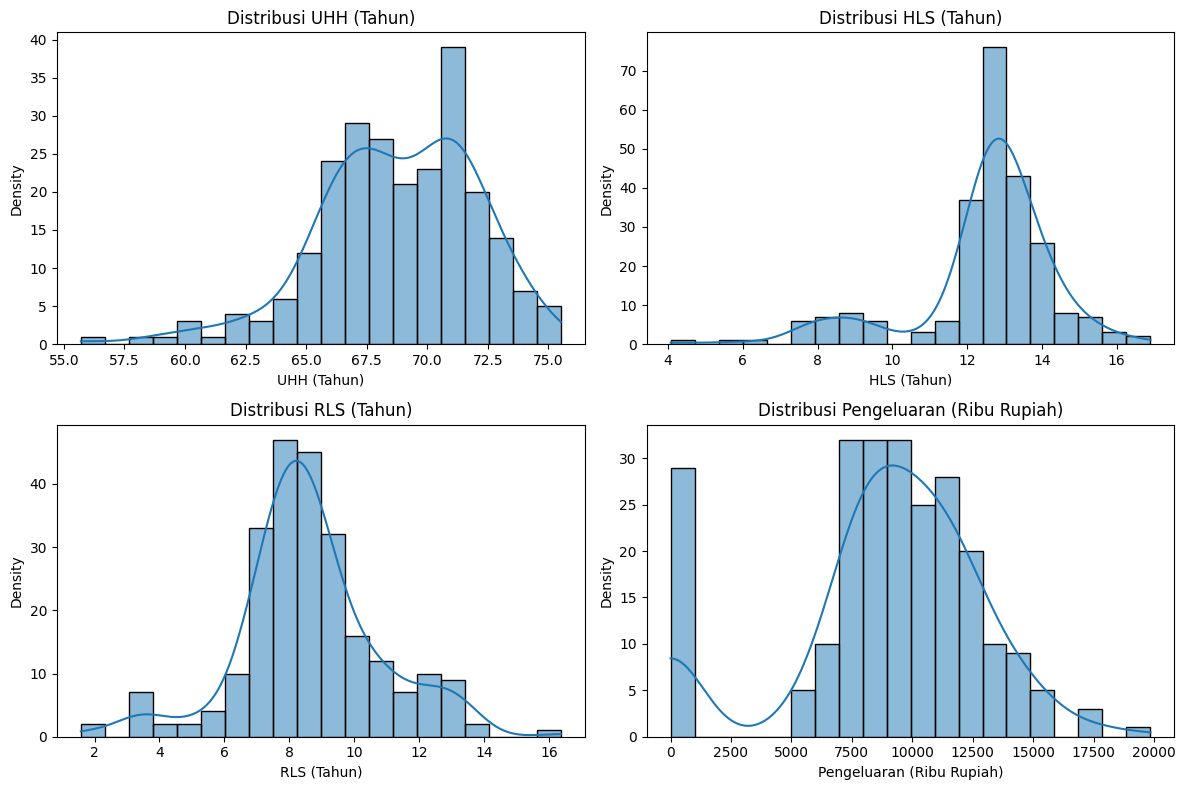

In [ ]:
# Membuat plot untuk setiap kolom
plt.figure(figsize=(12, 8))

for i, kolom in enumerate(df_atribut, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[kolom], bins=20, kde=True)
    plt.title(f'Distribusi {kolom}')
    plt.xlabel(kolom)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

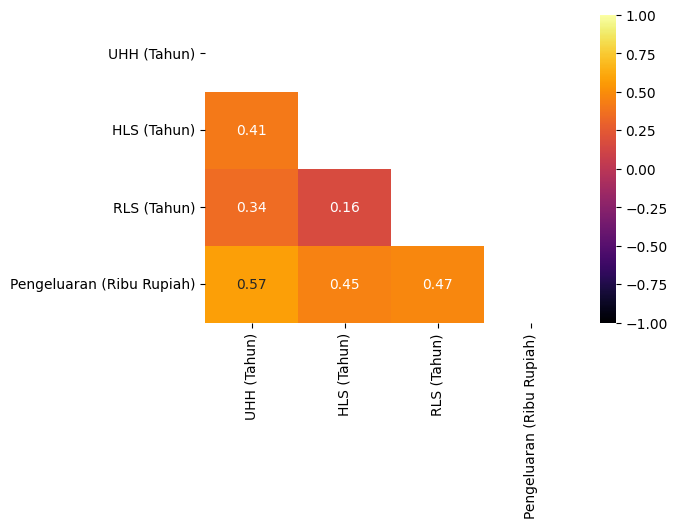

In [ ]:
plt.figure(figsize=(6, 4))
mask = np.triu(np.ones_like(df_atribut.corr(), dtype=bool))
correlation_plot = sns.heatmap(df_atribut.corr(), annot=True, vmax=1, vmin=-1, center=0, cmap='inferno', mask=mask)
plt.show()

## EDA

In [ ]:
df_atribut.describe()

,UHH (Tahun),HLS (Tahun),RLS (Tahun),Pengeluaran (Ribu Rupiah)
count,241.000000,241.000000,241.000000,241.000000
mean,68.786639,12.483651,8.618921,8907.508651
std,3.287830,1.886402,2.177037,4075.637821
min,55.700000,4.070000,1.580000,4.190000
25%,66.720000,12.270000,7.560000,7627.000000
50%,68.970000,12.850000,8.400000,9425.000000
75%,71.200000,13.400000,9.540000,11559.000000
max,75.510000,16.900000,16.360000,19850.000000


In [ ]:
df.columns

Index(['Provinsi', 'Kota/Kabupaten', 'UHH (Tahun)', 'HLS (Tahun)',
       'RLS (Tahun)', 'Pengeluaran (Ribu Rupiah)', 'IPM', 'Kategori IPM'],
      dtype='object')

In [ ]:
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Regresi Linier
X = df[['UHH (Tahun)', 'HLS (Tahun)', 'RLS (Tahun)', 'Pengeluaran (Ribu Rupiah)']]
Y = df['IPM']
X = sm.add_constant(X) #

model = sm.OLS(Y, X).fit()
print("\nHasil Regresi Linier:")
print(model.summary())


Hasil Regresi Linier:
                            OLS Regression Results                            
Dep. Variable:                    IPM   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1234.
Date:                Mon, 10 Jun 2024   Prob (F-statistic):          6.92e-157
Time:                        15:33:55   Log-Likelihood:                -444.17
No. Observations:                 241   AIC:                             898.3
Df Residuals:                     236   BIC:                             915.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

<ipython-input-40-4dc14deb1172>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients.index, y=coefficients.values, palette='viridis')


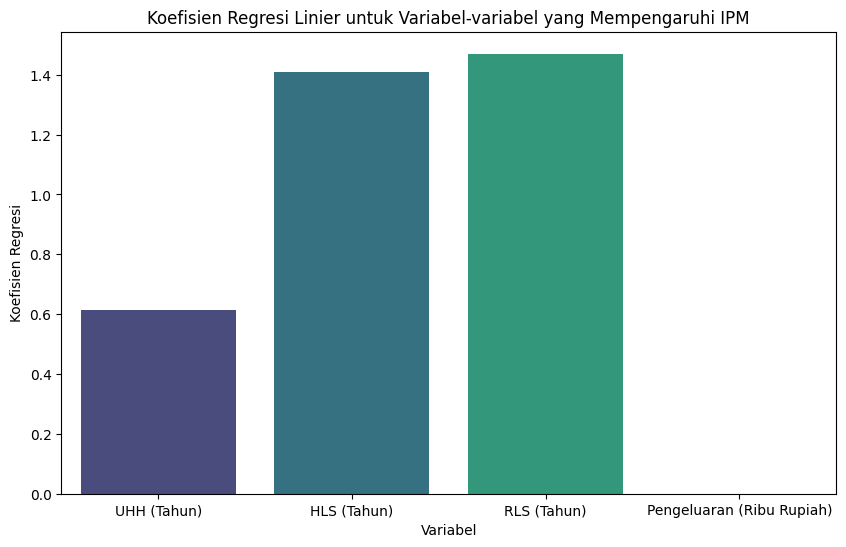

In [ ]:
model = sm.OLS(Y, X).fit()
coefficients = model.params[1:]

# Visualisasi koefisien
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients.index, y=coefficients.values, palette='viridis')
plt.title('Koefisien Regresi Linier untuk Variabel-variabel yang Mempengaruhi IPM')
plt.xlabel('Variabel')
plt.ylabel('Koefisien Regresi')
plt.show()

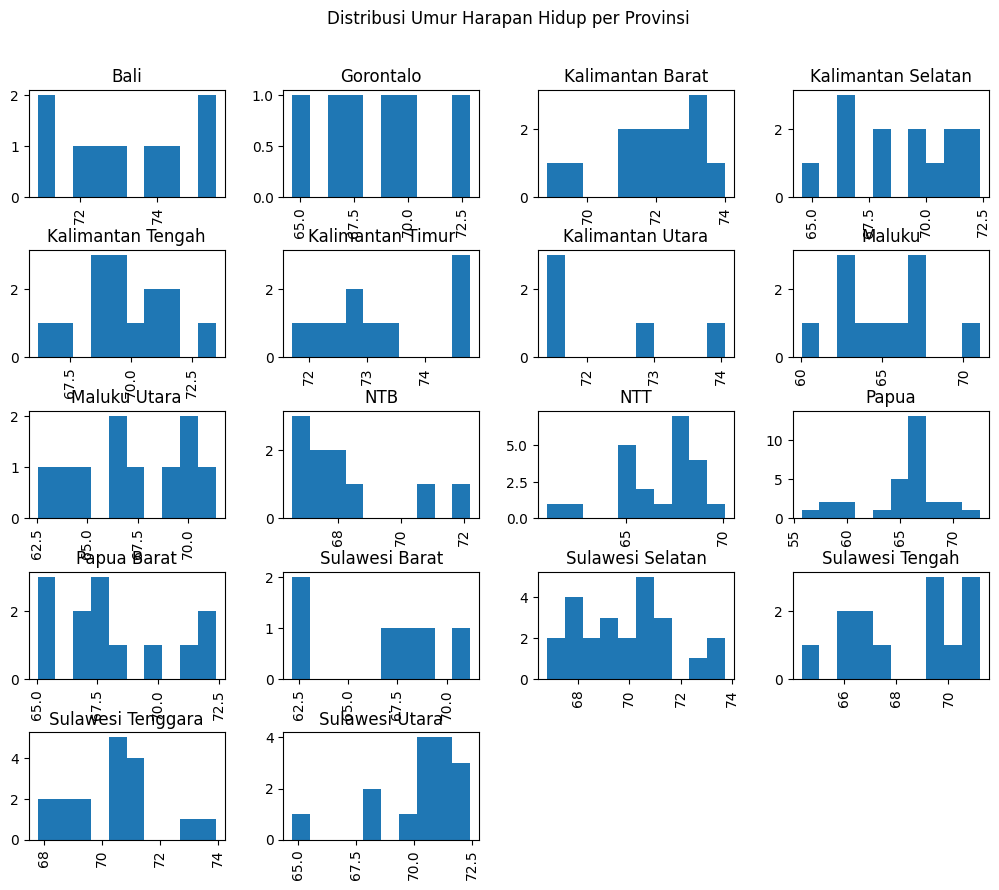

In [ ]:
# Histogram Distribusi Umur Harapan Hidup
df.hist(column=['UHH (Tahun)'], by='Provinsi', figsize=(12, 10))
plt.suptitle('Distribusi Umur Harapan Hidup per Provinsi')
plt.show()

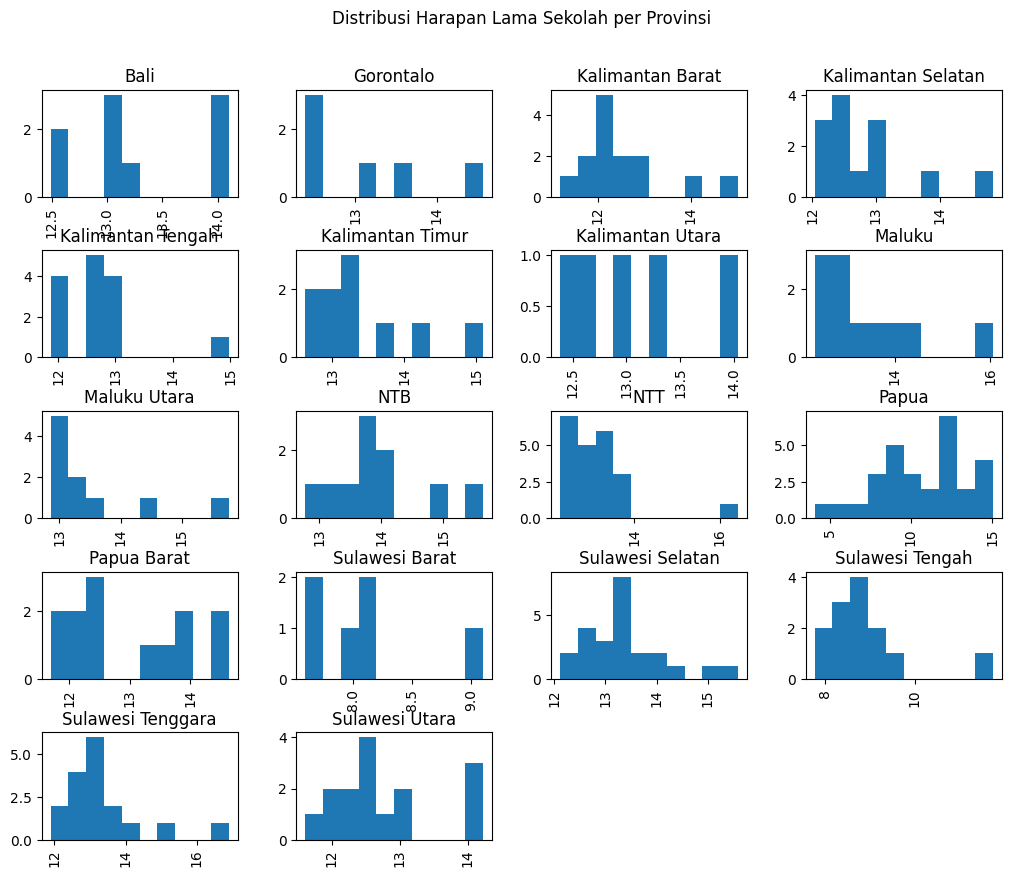

In [ ]:
# Histogram Distribusi Harapan Lama Sekolah
df.hist(column=['HLS (Tahun)'], by='Provinsi', figsize=(12, 10))
plt.suptitle('Distribusi Harapan Lama Sekolah per Provinsi')
plt.show()

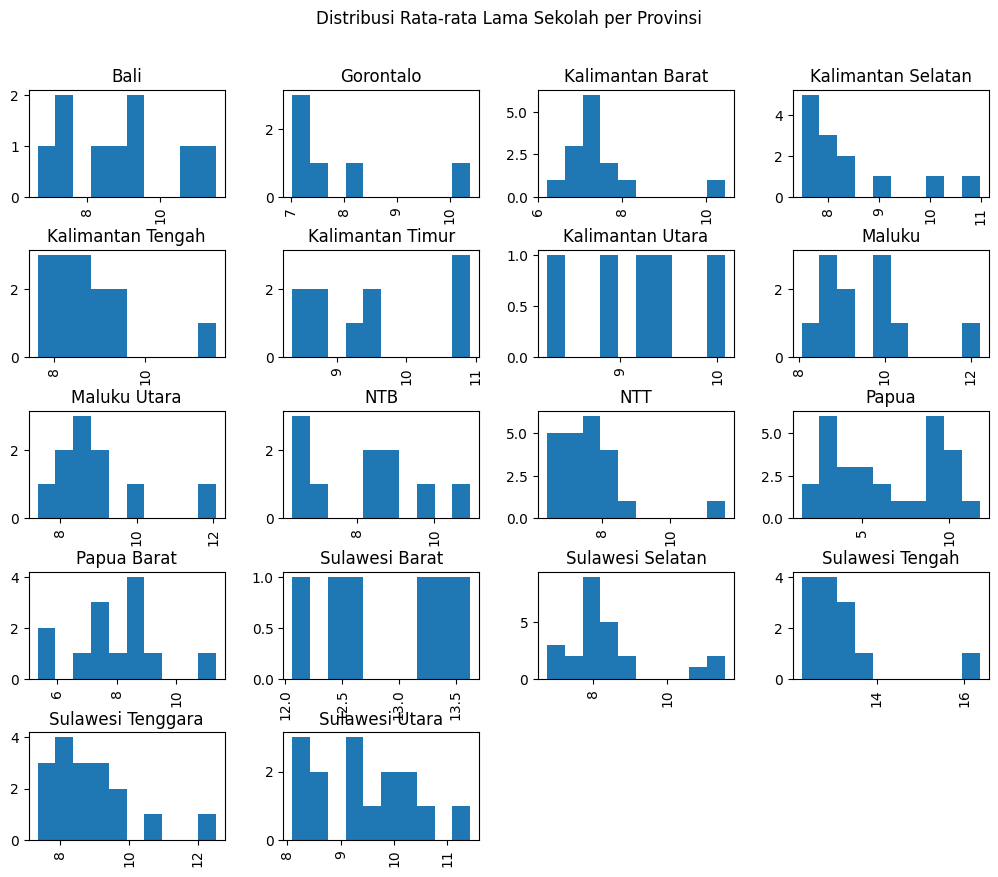

In [ ]:
# Histogram Distribusi Rata-rata Lama Sekolah
df.hist(column=['RLS (Tahun)'], by='Provinsi', figsize=(12, 10))
plt.suptitle('Distribusi Rata-rata Lama Sekolah per Provinsi')
plt.show()

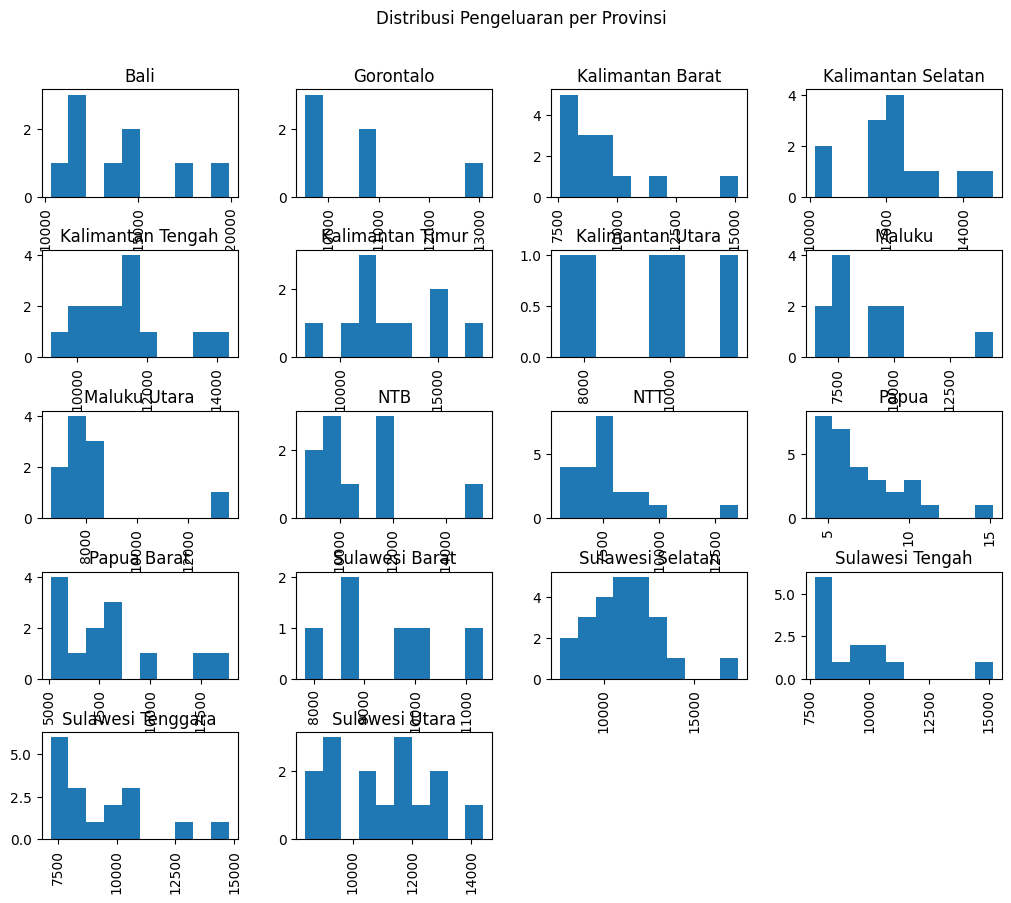

In [ ]:
# Histogram Distribusi Pengeluaran
df.hist(column=['Pengeluaran (Ribu Rupiah)'], by='Provinsi', figsize=(12, 10))
plt.suptitle('Distribusi Pengeluaran per Provinsi')
plt.show()

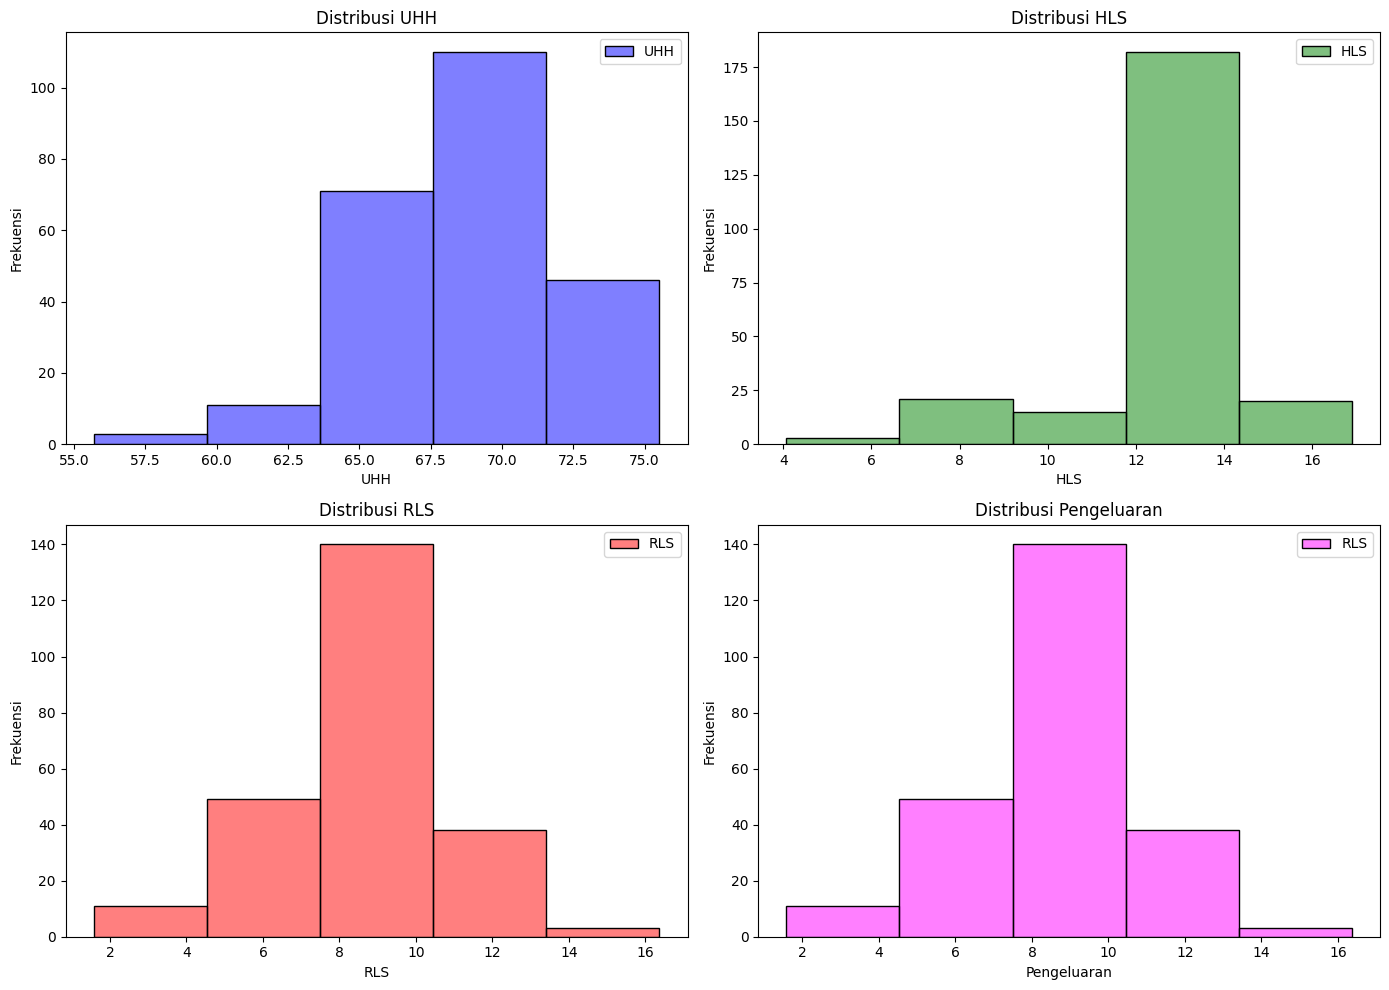

In [ ]:
plt.figure(figsize=(14, 10))

# Histogram Umur Harapan Hidup
plt.subplot(2, 2, 1)
sns.histplot(df['UHH (Tahun)'], bins=5, color='blue', alpha=0.5, label='UHH')
plt.title('Distribusi UHH')
plt.xlabel('UHH')
plt.ylabel('Frekuensi')
plt.legend()

# Histogram Harapan Lama Sekolah
plt.subplot(2, 2, 2)
sns.histplot(df['HLS (Tahun)'], bins=5, color='green', alpha=0.5, label='HLS')
plt.title('Distribusi HLS')
plt.xlabel('HLS')
plt.ylabel('Frekuensi')
plt.legend()

# Histogram Rata-rata Lama Sekolah
plt.subplot(2, 2, 3)
sns.histplot(df['RLS (Tahun)'], bins=5, color='red', alpha=0.5, label='RLS')
plt.title('Distribusi RLS')
plt.xlabel('RLS')
plt.ylabel('Frekuensi')
plt.legend()

# Histogram Pengeluaran
plt.subplot(2, 2, 4)
sns.histplot(df['RLS (Tahun)'], bins=5, color='magenta', alpha=0.5, label='RLS')
plt.title('Distribusi Pengeluaran')
plt.xlabel('Pengeluaran')
plt.ylabel('Frekuensi')
plt.legend()

plt.tight_layout()
plt.show()

## **Coba Deteksi Outlier**
Melakukan visualisasi boxpolot untuk melihat apakah ada nilai outlier pada setiap variabelnya. Di mana jika melebihi quartil atas dan quartil bawahnya dianggap sebagai outlier

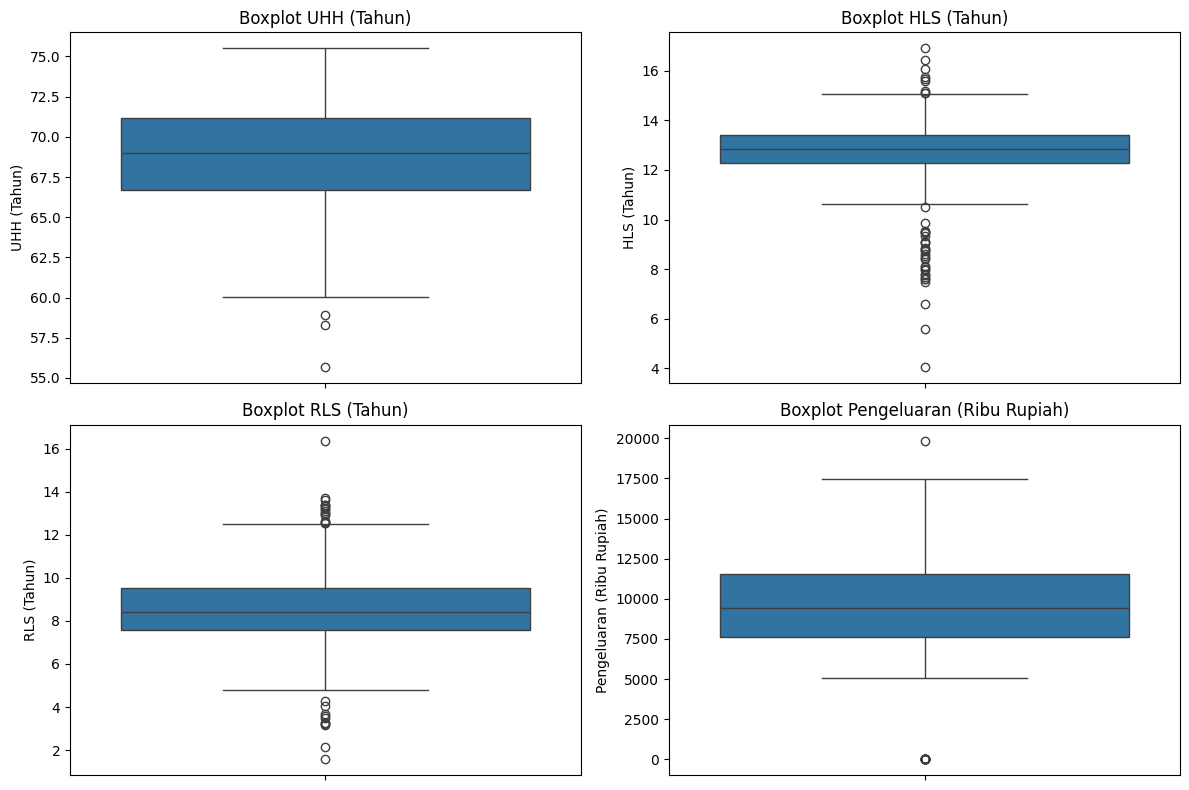

In [ ]:
# Visualisasi distribusi data dengan boxplot setelah menangani outlier
plt.figure(figsize=(12, 8))

for i, kolom in enumerate(df_atribut, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[kolom])
    plt.title(f'Boxplot {kolom}')
    plt.ylabel(kolom)

plt.tight_layout()
plt.show()

In [ ]:

threshold = 3  # Misalnya, threshold Z-score yang diinginkan
outliers_count = {}  # Dictionary untuk menyimpan jumlah outlier untuk setiap variabel

from scipy import stats

# Menghitung Z-score dan menentukan outlier untuk setiap variabel dalam df_numeric
for column in df_atribut.columns:
    z_scores = np.abs(stats.zscore(df_atribut[column]))
    outliers = df_atribut[column][z_scores > threshold]
    outliers_count[column] = len(outliers)

# Menampilkan jumlah outlier untuk setiap variabel
print("Jumlah outlier untuk setiap variabel:")
outliers_count

Jumlah outlier untuk setiap variabel:


{'UHH (Tahun)': 3,
 'HLS (Tahun)': 3,
 'RLS (Tahun)': 2,
 'Pengeluaran (Ribu Rupiah)': 0}

# **Mengatasi Nilai Outlier Pada Data Dengan Normalisasi**
terlihat pada hasil visualisasi boxplot terdapat nilai outlier pada setiap variabelnya sehingga perlu dilakukan penanganan lebih lanjut. Karena dataset ini penting maka tidak dapat dilakukan remove pada nilai outlier. Sehingga peneliti menggunakan normalisasi data Min Max

In [ ]:
import numpy as np
import pandas as pd

# Membaca data
data = df_atribut
# Normalisasi Min-Max
datanorm = (data - data.min()) / (data.max() - data.min())

print("\nData Setelah Normalisasi Min-Max:")
datanorm


Data Setelah Normalisasi Min-Max:


,UHH (Tahun),HLS (Tahun),RLS (Tahun),Pengeluaran (Ribu Rupiah)
0,0.586068,0.789556,0.504736,0.000314
1,0.230187,0.682775,0.281461,0.000180
2,0.593135,0.805144,0.587957,0.000304
3,0.641595,0.652377,0.580514,0.000244
4,0.691065,0.680436,0.548714,0.000176
...,...,...,...,...
236,0.220091,0.688231,0.482409,0.483065
237,0.367491,0.658613,0.486468,0.353012
238,0.554770,0.682775,0.438430,0.388586
239,0.772337,0.933749,0.719215,0.725635


In [ ]:
datanorm.describe()

,UHH (Tahun),HLS (Tahun),RLS (Tahun),Pengeluaran (Ribu Rupiah)
count,241.000000,241.000000,241.000000,241.000000
mean,0.660608,0.655780,0.476246,0.448625
std,0.165968,0.147031,0.147296,0.205365
min,0.000000,0.000000,0.000000,0.000000
25%,0.556285,0.639127,0.404601,0.384102
50%,0.669864,0.684334,0.461434,0.474700
75%,0.782433,0.727202,0.538566,0.582229
max,1.000000,1.000000,1.000000,1.000000


# **Clustering dengan Kmeans**

## Metode "Elbow Method": Cek Jumlah Kluster Terbaik Berdasarkan Data

Selanjutnya peneliti melakukan clustering pada data menggunakan KMeans. Untuk menentukan jumlah cluster terbaik, peneliti menggunakan metode Elbow untuk menemukan jumlah cluster terbaiknya.

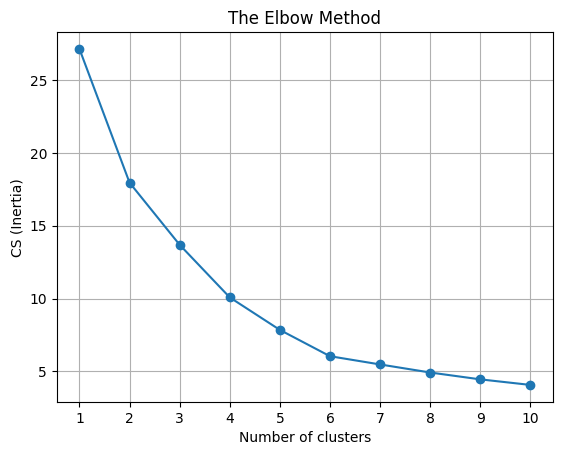

In [ ]:
# Menyimpan nilai inertia (sum of squared distances to closest cluster center) untuk setiap nilai k
cs = []

# Menjalankan KMeans untuk sejumlah klaster yang berbeda
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(datanorm)
    cs.append(kmeans.inertia_)

# Plot hasilnya menggunakan Metode Elbow
plt.plot(range(1, 11), cs, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS (Inertia)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

Terlihat hasilnya menunjukkan cluster 4 merupakan cluster terbaik. Karena pada number of cluster mualai dari cluster 1 - 4 terjadi turunan yang curam dan 5 - 10 turunannya landai sehingga peneliti memberikan kesimpulan dengan cluster 4 sebagai cluster terbaiknya.

## **Train Model**
melakukan pemodelan KMeans pada datanya, membentuk cluster dan centroid

In [ ]:
from sklearn.cluster import KMeans
k_means = KMeans()

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=1000, n_init=5,random_state=3)
kmeans.fit(datanorm)

KMeans(max_iter=1000, n_clusters=4, n_init=5, random_state=3)

## Predict Label Data
Melakukan prediksi pada setiap label(cluster) datanya.

In [ ]:
label = kmeans.fit_predict(datanorm)

In [ ]:
# Memasukkan Label ke dalam Dataset
output = datanorm.copy()
output['label'] = label
output['label'].value_counts()

label
0    117
1     87
2     19
3     18
Name: count, dtype: int64

terlihat jika pada cluster 1 atau pada label 0 memiliki anggota cluster terbanyak dibanding anggota cluster lain yaitu bernilai 117 anggota, sehingga menurut peneliti terlihat jika sebaran tidak merata.

In [ ]:
output.head()

,UHH (Tahun),HLS (Tahun),RLS (Tahun),Pengeluaran (Ribu Rupiah),label
0,0.586068,0.789556,0.504736,0.000314,1
1,0.230187,0.682775,0.281461,0.000180,3
2,0.593135,0.805144,0.587957,0.000304,1
3,0.641595,0.652377,0.580514,0.000244,1
4,0.691065,0.680436,0.548714,0.000176,1


### **Menentukan Centroid pada Data**
Peneliti menentukan centroid pada data dan melakukan visualisasi pada datanya.

In [ ]:
centroid=kmeans.cluster_centers_
centroid

array([[7.81725538e-01, 7.17922071e-01, 4.96298995e-01, 5.80024593e-01],
       [5.59760251e-01, 6.92522016e-01, 4.42435413e-01, 3.59473842e-01],
       [6.13007784e-01, 3.56893793e-01, 7.80464354e-01, 4.72639578e-01],
       [4.11015761e-01, 3.89754915e-01, 1.88204781e-01, 7.08853797e-05]])

###### **Melakukan visualisasi pada variabel UHH dan Pengeluaran**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-57-7febb34b844c>:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(datanorm[datanorm['Cluster'] == i]['UHH (Tahun)'], datanorm[datanorm['Cluster'] == i]['Pengeluaran (Ribu Rupiah)'], cmap='viridis', marker='o', edgecolor='k', label=f'Cluster {i}')


Centroid dari setiap cluster (4 cluster):
[[7.81725538e-01 7.17922071e-01 4.96298995e-01 5.80024593e-01
  9.99200722e-16]
 [5.59760251e-01 6.92522016e-01 4.42435413e-01 3.59473842e-01
  1.00000000e+00]
 [4.11015761e-01 3.89754915e-01 1.88204781e-01 7.08853797e-05
  3.00000000e+00]
 [6.13007784e-01 3.56893793e-01 7.80464354e-01 4.72639578e-01
  2.00000000e+00]]
Jumlah centroid: 4


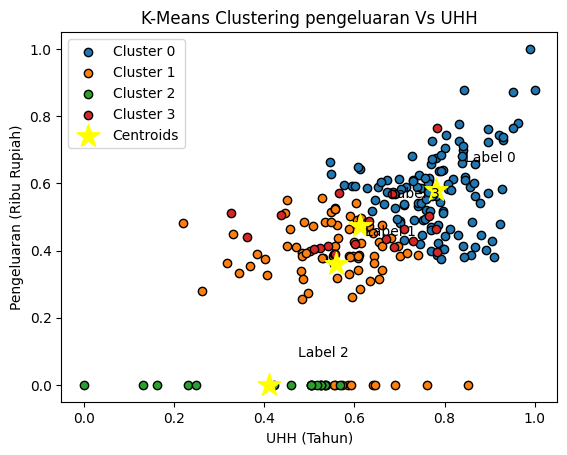

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

datanorm = output

# Melakukan clustering dengan K-Means untuk 4 cluster
kmeans = KMeans(n_clusters=4, random_state=0).fit(datanorm)

# Mendapatkan label cluster untuk setiap data poin
labels = kmeans.labels_

# Mendapatkan koordinat centroid
centroids = kmeans.cluster_centers_

# Menampilkan hasil
print("Centroid dari setiap cluster (4 cluster):")
print(centroids)
print("Jumlah centroid:", len(centroids))

# Menambahkan label cluster ke DataFrame
datanorm['Cluster'] = labels

# Plot data poin dan centroid
for i in range(len(centroids)):
    plt.scatter(datanorm[datanorm['Cluster'] == i]['UHH (Tahun)'], datanorm[datanorm['Cluster'] == i]['Pengeluaran (Ribu Rupiah)'], cmap='viridis', marker='o', edgecolor='k', label=f'Cluster {i}')

plt.scatter(centroids[:, 0], centroids[:, 3], s=300, c='yellow', marker='*', label='Centroids')

# Menambahkan label agenda untuk setiap centroid
for i, txt in enumerate(range(len(centroids))):
    plt.annotate('Label {}'.format(i), (centroids[i, 0], centroids[i, 3]), xytext=(centroids[i, 0] + 20, centroids[i, 3] + 20), textcoords='offset points', fontsize=10, color='black')

plt.title('K-Means Clustering pengeluaran Vs UHH')
plt.xlabel('UHH (Tahun)')
plt.ylabel('Pengeluaran (Ribu Rupiah)')
plt.legend()
plt.show()

Hasil dari clustering terlihat jika pada variabel UHH dan pengeluaran terdapat 4 cluster dan 4 centroid seperti data di atas.

##### **melakukan visualisasi data menggunakan t-Distributed Stochastic Neighbor Embedding atau disebut t-SNE. T-SNE merupakan teknik untuk visualisasi data berdimensi tinggi dalam bentuk dua atau tiga dimensi, membuatnya lebih mudah untuk melihat pola dan cluster dalam data Anda.dan kemudian memplot hasilnya.**

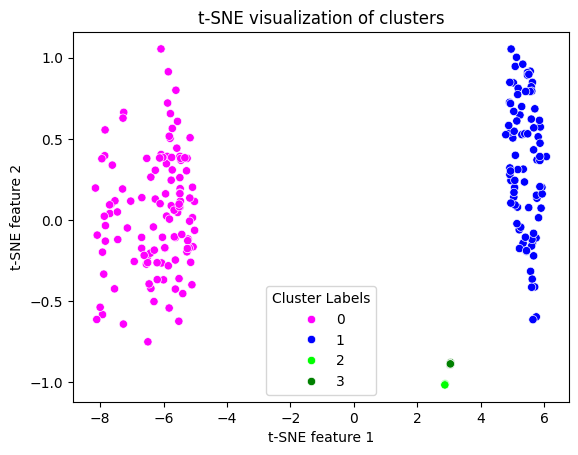

In [ ]:
from sklearn.manifold import TSNE
m = TSNE(n_components=3, perplexity=90)
tsne_features = m.fit_transform(datanorm)
output['x']=tsne_features[:,0]
output['y']=tsne_features[:,1]

import seaborn as sns
import matplotlib.pyplot as plt
palette = ['magenta', 'blue', 'lime', 'green']

# Plotting dengan Seaborn
sns.scatterplot(x='x', y='y', hue='label', palette=palette, data=output)
plt.title('t-SNE visualization of clusters')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.legend(title='Cluster Labels')
plt.show()

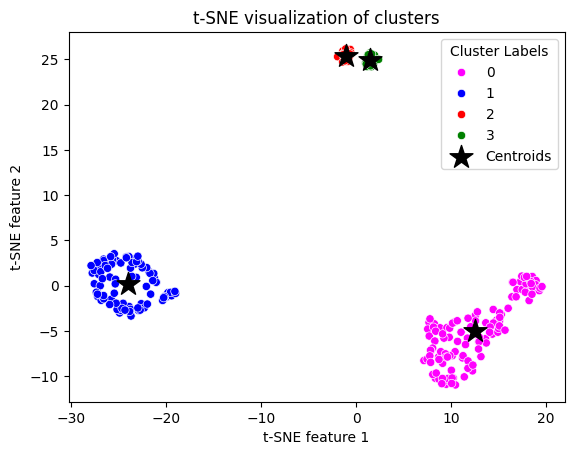

In [ ]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Contoh DataFrame (silakan ganti dengan data Anda)
data = datanorm
labels = kmeans.labels_

# Menambahkan label cluster ke DataFrame
datanorm['label'] = labels

# Menggunakan t-SNE untuk mengurangi dimensi data menjadi 2 dimensi
m = TSNE(n_components=2, perplexity=30)
tsne_features = m.fit_transform(datanorm.drop('label', axis=1))

# Menyimpan hasil t-SNE ke DataFrame
output = datanorm.copy()
output['x'] = tsne_features[:, 0]
output['y'] = tsne_features[:, 1]

# Hitung centroid di ruang t-SNE
centroids = np.zeros((4, 2))
for i in range(4):
    centroids[i, :] = output[output['label'] == i][['x', 'y']].mean().values

# Warna untuk setiap cluster
palette = ['magenta', 'blue', 'red', 'green']

# Plotting dengan Seaborn
sns.scatterplot(x='x', y='y', hue='label', palette=palette, data=output)

# Menambahkan centroid ke plot
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='black', marker='*', label='Centroids')

plt.title('t-SNE visualization of clusters')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.legend(title='Cluster Labels')
plt.show()

## **Hasil Cluster Setiap Kab/Kota**
Peneliti mengelompokkan dan membuat dataset baru dengan melakukan filtering pada setiap labelnya sehingga dibuat data set setiap cluster.

In [ ]:
df1 = df.copy()
df1['label'] = label
df1

,Provinsi,Kota/Kabupaten,UHH (Tahun),HLS (Tahun),RLS (Tahun),Pengeluaran (Ribu Rupiah),IPM,Kategori IPM,label
0,Papua,Papua-Merauke,67.31,14.20,9.04,10.424,71.24,Tinggi,1
1,Papua,Jayawijaya,60.26,12.83,5.74,7.765,59.60,Rendah,3
2,Papua,Jayapura,67.45,14.40,10.27,10.230,72.67,Tinggi,1
3,Papua,Nabire,68.41,12.44,10.16,9.040,69.91,Sedang,1
4,Papua,Kepulauan Yapen,69.39,12.80,9.69,7.685,68.41,Sedang,1
...,...,...,...,...,...,...,...,...,...
236,Maluku,Seram Bagian Timur,60.06,12.90,8.71,9591.000,65.05,Sedang,1
237,Maluku,Maluku Barat Daya,62.98,12.52,8.77,7010.000,63.07,Sedang,1
238,Maluku,Buru Selatan,66.69,12.83,8.06,7716.000,65.37,Sedang,1
239,Maluku,Ambon,71.00,16.05,12.21,14405.000,81.63,Sangat Tinggi,0


In [ ]:
# Mengelompokkan data berdasarkan label dan menghitung jumlah provinsi dan kabupaten/kota di setiap label
value_counts = df1.groupby('label')[['Provinsi', 'Kota/Kabupaten']].nunique()
value_counts

,Provinsi,Kota/Kabupaten
label,,
0,15,117
1,13,87
2,2,19
3,1,18


### **cluster 1**

In [ ]:
cluster1 = df1.loc[df1['label'] == 0, ['Provinsi', 'Kota/Kabupaten', 'IPM', 'UHH (Tahun)', 'HLS (Tahun)', 'RLS (Tahun)', 'Pengeluaran (Ribu Rupiah)','Kategori IPM', 'label']]
cluster1

,Provinsi,Kota/Kabupaten,IPM,UHH (Tahun),HLS (Tahun),RLS (Tahun),Pengeluaran (Ribu Rupiah),Kategori IPM,label
29,Papua Barat,Fakfak,69.12,71.22,14.64,9.08,7678.0,Sedang,0
33,Papua Barat,Manokwari,72.60,71.91,13.77,8.45,12179.0,Tinggi,0
41,Papua Barat,Kota Sorong,78.98,72.37,14.40,11.32,13874.0,Tinggi,0
49,Sulawesi Tenggara,Muna,69.61,70.47,14.01,8.52,8328.0,Sedang,0
50,Sulawesi Tenggara,Konawe,72.04,70.38,13.03,9.30,10552.0,Tinggi,0
...,...,...,...,...,...,...,...,...,...
218,NTB,Kota Mataram,79.59,72.20,15.65,9.55,15416.0,Tinggi,0
219,NTB,Kota Bima,76.84,70.83,15.05,10.94,11395.0,Tinggi,0
228,Maluku Utara,Ternate,80.81,71.38,15.76,12.06,13586.0,Sangat Tinggi,0
229,Maluku Utara,Tidore Kepulauan,71.55,69.75,14.36,9.96,8586.0,Tinggi,0


In [ ]:
# Menghitung banyaknya tiap kategori dalam cluster 1
kategori_counts = cluster1['Kategori IPM'].value_counts()

# Menghitung rata-rata IPM di cluster 1
rata_rata_ipm = cluster1['IPM'].mean()

# Menampilkan hasil
print("Banyaknya tiap kategori dalam cluster 1:")
print(kategori_counts)
print("\nRata-rata IPM di cluster 1:")
print(rata_rata_ipm)

Banyaknya tiap kategori dalam cluster 1:
Kategori IPM
Tinggi           69
Sedang           36
Sangat Tinggi    12
Name: count, dtype: int64

Rata-rata IPM di cluster 1:
72.76538461538459


Cluster 1 termasuk dalam kategori tinggi sehingga tidak terlalu urgent untuk melakukan analisis lanjutan

In [ ]:
cluster1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, 29 to 239
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Provinsi                   117 non-null    object 
 1   Kota/Kabupaten             117 non-null    object 
 2   IPM                        117 non-null    float64
 3   UHH (Tahun)                117 non-null    float64
 4   HLS (Tahun)                117 non-null    float64
 5   RLS (Tahun)                117 non-null    float64
 6   Pengeluaran (Ribu Rupiah)  117 non-null    float64
 7   Kategori IPM               117 non-null    object 
 8   label                      117 non-null    int32  
dtypes: float64(5), int32(1), object(3)
memory usage: 8.7+ KB


In [ ]:
# Menghapus kolom Provinsi
c1 = cluster1.drop(columns=['Provinsi'])

# Menampilkan deskripsi statistik
print("Statistik Deskriptif:")
display(c1.describe())

# Identifikasi jumlah kota/kabupaten dalam setiap provinsi
print("\nJumlah Kota/Kabupaten dalam Setiap Provinsi: ")
display(cluster1['Provinsi'].value_counts())

Statistik Deskriptif:


,IPM,UHH (Tahun),HLS (Tahun),RLS (Tahun),Pengeluaran (Ribu Rupiah),label
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.0
mean,72.765385,71.185983,13.280940,8.915299,11515.247863,0.0
std,4.413311,1.840614,1.072646,1.357321,2338.412451,0.0
min,65.580000,66.510000,11.180000,6.600000,7446.000000,0.0
25%,69.700000,70.150000,12.580000,8.010000,9812.000000,0.0
50%,71.530000,71.180000,13.020000,8.540000,11593.000000,0.0
75%,74.690000,72.370000,13.880000,9.550000,12690.000000,0.0
max,84.510000,75.510000,16.900000,12.520000,19850.000000,0.0



Jumlah Kota/Kabupaten dalam Setiap Provinsi: 


Provinsi
Sulawesi Selatan      19
Kalimantan Barat      13
Kalimantan Tengah     13
Sulawesi Utara        12
Sulawesi Tenggara     11
Kalimantan Selatan    11
Kalimantan Timur      10
Bali                   9
Kalimantan Utara       5
NTB                    4
Papua Barat            3
Gorontalo              3
Maluku Utara           2
NTT                    1
Maluku                 1
Name: count, dtype: int64

In [ ]:
top10 = cluster1.nlargest(5, 'UHH (Tahun)')[['Provinsi', 'Kota/Kabupaten', 'IPM', 'UHH (Tahun)','Kategori IPM']]
bottom10 = cluster1.nsmallest(5, 'UHH (Tahun)')[['Provinsi', 'Kota/Kabupaten', 'IPM', 'UHH (Tahun)', 'Kategori IPM']]

print("\n10 Kota/Kabupaten dengan Tingkat Umur Harapan Hidup Tertinggi pada Cluster 1: ")
display(top10)
print("\n10 Kota/Kabupaten dengan Tingkat Umur Harapan Hidup Terendah pada Cluster 1: ")
display(bottom10)


10 Kota/Kabupaten dengan Tingkat Umur Harapan Hidup Tertinggi pada Cluster 1: 


,Provinsi,Kota/Kabupaten,IPM,UHH (Tahun),Kategori IPM
181,Bali,Kab. Badung,82.13,75.51,Sangat Tinggi
187,Bali,Kota Denpasar,84.37,75.30,Sangat Tinggi
143,Kalimantan Timur,Balikpapan,81.13,74.78,Sangat Tinggi
145,Kalimantan Timur,Bontang,80.94,74.57,Sangat Tinggi
144,Kalimantan Timur,Samarinda,81.43,74.56,Sangat Tinggi



10 Kota/Kabupaten dengan Tingkat Umur Harapan Hidup Terendah pada Cluster 1: 


,Provinsi,Kota/Kabupaten,IPM,UHH (Tahun),Kategori IPM
128,Kalimantan Selatan,HULU SUNGAI SELATAN,69.76,66.51,Sedang
129,Kalimantan Selatan,HULU SUNGAI TENGAH,69.70,66.54,Sedang
73,Sulawesi Selatan,Pangkajene dan Kepulauan,69.79,67.12,Sedang
168,Kalimantan Tengah,Barito Selatan,71.01,67.48,Tinggi
210,NTB,Kabupaten Lombok Barat,69.41,67.63,Sedang


In [ ]:
top10 = cluster1.nlargest(5, 'HLS (Tahun)')[['Provinsi', 'Kota/Kabupaten', 'IPM', 'HLS (Tahun)','Kategori IPM']]
bottom10 = cluster1.nsmallest(5, 'HLS (Tahun)')[['Provinsi', 'Kota/Kabupaten', 'IPM', 'HLS (Tahun)','Kategori IPM']]

print("\n10 Kota/Kabupaten dengan Tingkat Harapan Lama Sekolah Tertinggi pada Cluster 1: ")
display(top10)
print("\n10 Kota/Kabupaten dengan Tingkat Harapan Lama Sekolah Terendah pada Cluster 1: ")
display(bottom10)


10 Kota/Kabupaten dengan Tingkat Harapan Lama Sekolah Tertinggi pada Cluster 1: 


,Provinsi,Kota/Kabupaten,IPM,HLS (Tahun),Kategori IPM
63,Sulawesi Tenggara,Kota Kendari,84.51,16.90,Sangat Tinggi
209,NTT,Kota Kupang,80.20,16.43,Sangat Tinggi
239,Maluku,Ambon,81.63,16.05,Sangat Tinggi
228,Maluku Utara,Ternate,80.81,15.76,Sangat Tinggi
218,NTB,Kota Mataram,79.59,15.65,Tinggi



10 Kota/Kabupaten dengan Tingkat Harapan Lama Sekolah Terendah pada Cluster 1: 


,Provinsi,Kota/Kabupaten,IPM,HLS (Tahun),Kategori IPM
155,Kalimantan Barat,Melawi,66.81,11.18,Sedang
102,Sulawesi Utara,Bolaang Mongondow,68.95,11.61,Sedang
150,Kalimantan Barat,Sanggau,66.91,11.65,Sedang
177,Kalimantan Tengah,Murung Raya,68.63,11.87,Sedang
154,Kalimantan Barat,Sekadau,65.58,11.90,Sedang


In [ ]:
top10 = cluster1.nlargest(5, 'RLS (Tahun)')[['Provinsi', 'Kota/Kabupaten', 'IPM', 'RLS (Tahun)','Kategori IPM']]
bottom10 = cluster1.nsmallest(5, 'RLS (Tahun)')[['Provinsi', 'Kota/Kabupaten', 'IPM', 'RLS (Tahun)','Kategori IPM']]

print("\n10 Kota/Kabupaten dengan Tingkat Tingginya Rata rata Lama Sekolah pada Cluster 1: ")
display(top10)
print("\n10 Kota/Kabupaten dengan Tingkat Rendahnya Rata rata Lama Sekolah pada Cluster 1: ")
display(bottom10)


10 Kota/Kabupaten dengan Tingkat Tingginya Rata rata Lama Sekolah pada Cluster 1: 


,Provinsi,Kota/Kabupaten,IPM,RLS (Tahun),Kategori IPM
63,Sulawesi Tenggara,Kota Kendari,84.51,12.52,Sangat Tinggi
239,Maluku,Ambon,81.63,12.21,Sangat Tinggi
228,Maluku Utara,Ternate,80.81,12.06,Sangat Tinggi
209,NTT,Kota Kupang,80.20,11.61,Sangat Tinggi
86,Sulawesi Selatan,Makassar,83.12,11.55,Sangat Tinggi



10 Kota/Kabupaten dengan Tingkat Rendahnya Rata rata Lama Sekolah pada Cluster 1: 


,Provinsi,Kota/Kabupaten,IPM,RLS (Tahun),Kategori IPM
210,NTB,Kabupaten Lombok Barat,69.41,6.60,Sedang
185,Bali,Kab. Karangasem,68.28,6.67,Sedang
146,Kalimantan Barat,Sambas,67.95,6.74,Sedang
67,Sulawesi Selatan,Bantaeng,69.69,6.81,Sedang
147,Kalimantan Barat,Bengkayang,68.74,7.00,Sedang


In [ ]:
top10 = cluster1.nlargest(5, 'Pengeluaran (Ribu Rupiah)')[['Provinsi', 'Kota/Kabupaten', 'IPM', 'Pengeluaran (Ribu Rupiah)','Kategori IPM']]
bottom10 = cluster1.nsmallest(5, 'Pengeluaran (Ribu Rupiah)')[['Provinsi', 'Kota/Kabupaten', 'IPM', 'Pengeluaran (Ribu Rupiah)','Kategori IPM']]

print("\n10 Kota/Kabupaten dengan Tingkat Pengeluaran Tertinggi pada Cluster 1: ")
display(top10)
print("\n10 Kota/Kabupaten dengan Tingkat Pengeluaran Terendah pada Cluster 1: ")
display(bottom10)


10 Kota/Kabupaten dengan Tingkat Pengeluaran Tertinggi pada Cluster 1: 


,Provinsi,Kota/Kabupaten,IPM,Pengeluaran (Ribu Rupiah),Kategori IPM
187,Bali,Kota Denpasar,84.37,19850.0,Sangat Tinggi
181,Bali,Kab. Badung,82.13,17445.0,Sangat Tinggi
86,Sulawesi Selatan,Makassar,83.12,17406.0,Sangat Tinggi
145,Kalimantan Timur,Bontang,80.94,17327.0,Sangat Tinggi
143,Kalimantan Timur,Balikpapan,81.13,15455.0,Sangat Tinggi



10 Kota/Kabupaten dengan Tingkat Pengeluaran Terendah pada Cluster 1: 


,Provinsi,Kota/Kabupaten,IPM,Pengeluaran (Ribu Rupiah),Kategori IPM
163,Kalimantan Utara,Nunukan,67.16,7446.0,Sedang
154,Kalimantan Barat,Sekadau,65.58,7566.0,Sedang
82,Sulawesi Selatan,Tana Toraja,69.88,7584.0,Sedang
153,Kalimantan Barat,Kapuas Hulu,66.70,7668.0,Sedang
29,Papua Barat,Fakfak,69.12,7678.0,Sedang


In [ ]:
top10 = cluster1.nlargest(5, 'IPM')[['Provinsi', 'Kota/Kabupaten', 'IPM', 'UHH (Tahun)', 'HLS (Tahun)', 'RLS (Tahun)', 'Pengeluaran (Ribu Rupiah)']]
bottom10 = cluster1.nsmallest(5, 'IPM')[['Provinsi', 'Kota/Kabupaten', 'IPM', 'UHH (Tahun)', 'HLS (Tahun)', 'RLS (Tahun)', 'Pengeluaran (Ribu Rupiah)']]

print("\n10 Kota/Kabupaten dengan Tingkat IPM Tertinggi pada Cluster 1: ")
display(top10)
print("\n10 Kota/Kabupaten dengan Tingkat IPM Terendah pada Cluster 1: ")
display(bottom10)



10 Kota/Kabupaten dengan Tingkat IPM Tertinggi pada Cluster 1: 


,Provinsi,Kota/Kabupaten,IPM,UHH (Tahun),HLS (Tahun),RLS (Tahun),Pengeluaran (Ribu Rupiah)
63,Sulawesi Tenggara,Kota Kendari,84.51,73.93,16.90,12.52,14765.0
187,Bali,Kota Denpasar,84.37,75.30,14.10,11.50,19850.0
86,Sulawesi Selatan,Makassar,83.12,72.40,15.59,11.55,17406.0
181,Bali,Kab. Badung,82.13,75.51,14.03,10.64,17445.0
239,Maluku,Ambon,81.63,71.00,16.05,12.21,14405.0



10 Kota/Kabupaten dengan Tingkat IPM Terendah pada Cluster 1: 


,Provinsi,Kota/Kabupaten,IPM,UHH (Tahun),HLS (Tahun),RLS (Tahun),Pengeluaran (Ribu Rupiah)
154,Kalimantan Barat,Sekadau,65.58,72.39,11.90,7.12,7566.0
153,Kalimantan Barat,Kapuas Hulu,66.70,72.69,12.14,7.59,7668.0
155,Kalimantan Barat,Melawi,66.81,73.14,11.18,7.18,8830.0
150,Kalimantan Barat,Sanggau,66.91,71.58,11.65,7.41,8782.0
149,Kalimantan Barat,Mempawah,66.94,71.47,12.87,7.17,8049.0


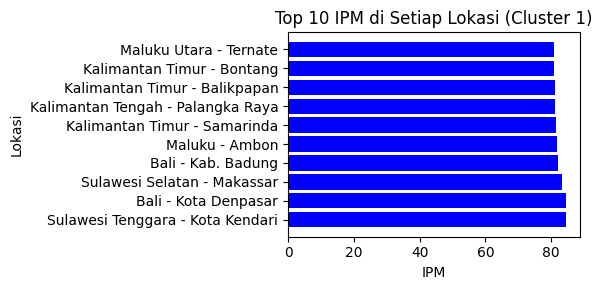

,Provinsi,Kota/Kabupaten,IPM
63,Sulawesi Tenggara,Kota Kendari,84.51
187,Bali,Kota Denpasar,84.37
86,Sulawesi Selatan,Makassar,83.12
181,Bali,Kab. Badung,82.13
239,Maluku,Ambon,81.63


In [ ]:
Top_c1 = cluster1.nlargest(10, 'IPM')[['Provinsi', 'Kota/Kabupaten', 'IPM']]
plt.figure(figsize=(6, 3))
plt.barh(Top_c1['Provinsi'] + ' - ' + Top_c1['Kota/Kabupaten'], Top_c1['IPM'], color='blue')
plt.ylabel('Lokasi')
plt.xlabel('IPM')
plt.title('Top 10 IPM di Setiap Lokasi (Cluster 1)')
plt.tight_layout()
plt.show()

Top_c1.head()

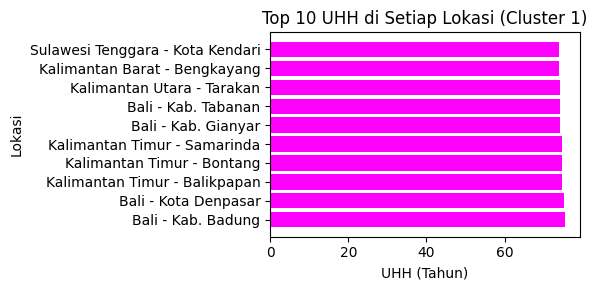

,Provinsi,Kota/Kabupaten,UHH (Tahun)
181,Bali,Kab. Badung,75.51
187,Bali,Kota Denpasar,75.30
143,Kalimantan Timur,Balikpapan,74.78
145,Kalimantan Timur,Bontang,74.57
144,Kalimantan Timur,Samarinda,74.56


In [ ]:
# Visualisasi UHH
Top_c1 = cluster1.nlargest(10, 'UHH (Tahun)')[['Provinsi', 'Kota/Kabupaten', 'UHH (Tahun)']]
plt.figure(figsize=(6, 3))
plt.barh(Top_c1['Provinsi'] + ' - ' + Top_c1['Kota/Kabupaten'], Top_c1['UHH (Tahun)'], color='magenta')
plt.ylabel('Lokasi')
plt.xlabel('UHH (Tahun)')
plt.title('Top 10 UHH di Setiap Lokasi (Cluster 1)')
plt.tight_layout()
plt.show()

Top_c1.head()

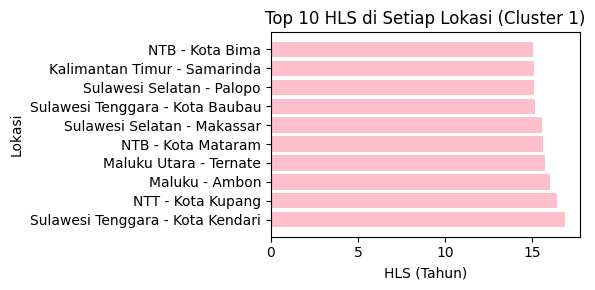

,Provinsi,Kota/Kabupaten,HLS (Tahun)
63,Sulawesi Tenggara,Kota Kendari,16.90
209,NTT,Kota Kupang,16.43
239,Maluku,Ambon,16.05
228,Maluku Utara,Ternate,15.76
218,NTB,Kota Mataram,15.65


In [ ]:
# Visualisasi HLS
Top_c1 = cluster1.nlargest(10, 'HLS (Tahun)')[['Provinsi', 'Kota/Kabupaten', 'HLS (Tahun)']]
plt.figure(figsize=(6, 3))
plt.barh(Top_c1['Provinsi'] + ' - ' + Top_c1['Kota/Kabupaten'], Top_c1['HLS (Tahun)'], color='pink')
plt.ylabel('Lokasi')
plt.xlabel('HLS (Tahun)')
plt.title('Top 10 HLS di Setiap Lokasi (Cluster 1)')
plt.tight_layout()
plt.show()

Top_c1.head()

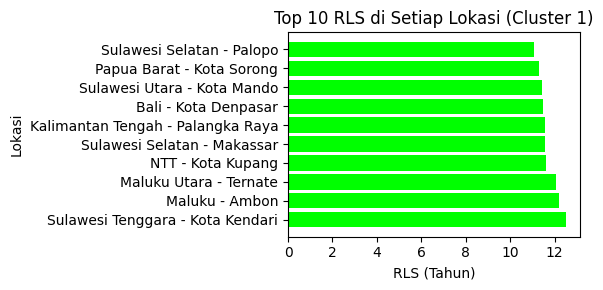

,Provinsi,Kota/Kabupaten,RLS (Tahun)
63,Sulawesi Tenggara,Kota Kendari,12.52
239,Maluku,Ambon,12.21
228,Maluku Utara,Ternate,12.06
209,NTT,Kota Kupang,11.61
86,Sulawesi Selatan,Makassar,11.55


In [ ]:
# Visualisasi RLS
Top_c1 = cluster1.nlargest(10, 'RLS (Tahun)')[['Provinsi', 'Kota/Kabupaten', 'RLS (Tahun)']]
plt.figure(figsize=(6, 3))
plt.barh(Top_c1['Provinsi'] + ' - ' + Top_c1['Kota/Kabupaten'], Top_c1['RLS (Tahun)'], color='lime')
plt.ylabel('Lokasi')
plt.xlabel('RLS (Tahun)')
plt.title('Top 10 RLS di Setiap Lokasi (Cluster 1)')
plt.tight_layout()
plt.show()

Top_c1.head()

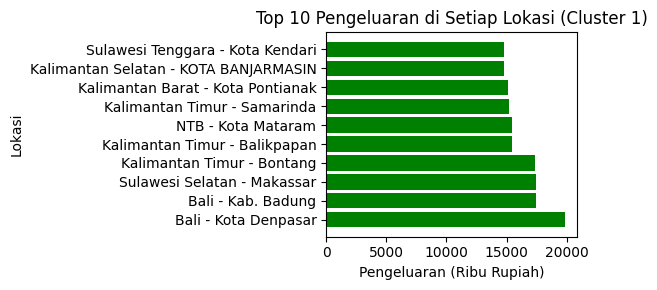

,Provinsi,Kota/Kabupaten,Pengeluaran (Ribu Rupiah)
187,Bali,Kota Denpasar,19850.0
181,Bali,Kab. Badung,17445.0
86,Sulawesi Selatan,Makassar,17406.0
145,Kalimantan Timur,Bontang,17327.0
143,Kalimantan Timur,Balikpapan,15455.0


In [ ]:
# Visualisasi Pengeluaran
Top_c1 = cluster1.nlargest(10, 'Pengeluaran (Ribu Rupiah)')[['Provinsi', 'Kota/Kabupaten', 'Pengeluaran (Ribu Rupiah)']]
plt.figure(figsize=(6, 3))
plt.barh(Top_c1['Provinsi'] + ' - ' + Top_c1['Kota/Kabupaten'], Top_c1['Pengeluaran (Ribu Rupiah)'], color='green')
plt.ylabel('Lokasi')
plt.xlabel('Pengeluaran (Ribu Rupiah)')
plt.title('Top 10 Pengeluaran di Setiap Lokasi (Cluster 1)')
plt.tight_layout()
plt.show()

Top_c1.head()

### **cluster 2**

In [ ]:
cluster2 = df1.loc[df1['label'] == 1, ['Provinsi', 'Kota/Kabupaten', 'IPM', 'UHH (Tahun)', 'HLS (Tahun)', 'RLS (Tahun)', 'Pengeluaran (Ribu Rupiah)', 'Kategori IPM','label']]
cluster2

,Provinsi,Kota/Kabupaten,IPM,UHH (Tahun),HLS (Tahun),RLS (Tahun),Pengeluaran (Ribu Rupiah),Kategori IPM,label
0,Papua,Papua-Merauke,71.24,67.31,14.20,9.04,10.424,Tinggi,1
2,Papua,Jayapura,72.67,67.45,14.40,10.27,10.230,Tinggi,1
3,Papua,Nabire,69.91,68.41,12.44,10.16,9.040,Sedang,1
4,Papua,Kepulauan Yapen,68.41,69.39,12.80,9.69,7.685,Sedang,1
5,Papua,Biak Numfor,72.85,68.50,14.21,10.53,9.788,Tinggi,1
...,...,...,...,...,...,...,...,...,...
235,Maluku,Seram Bagian Barat,66.67,62.25,13.58,9.24,8890.000,Sedang,1
236,Maluku,Seram Bagian Timur,65.05,60.06,12.90,8.71,9591.000,Sedang,1
237,Maluku,Maluku Barat Daya,63.07,62.98,12.52,8.77,7010.000,Sedang,1
238,Maluku,Buru Selatan,65.37,66.69,12.83,8.06,7716.000,Sedang,1


In [ ]:
# Menghitung banyaknya tiap kategori dalam cluster 1
kategori_counts = cluster2['Kategori IPM'].value_counts()

# Menghitung rata-rata IPM di cluster 1
rata_rata_ipm = cluster2['IPM'].mean()

# Menampilkan hasil
print("Banyaknya tiap kategori dalam cluster 2:")
print(kategori_counts)
print("\nRata-rata IPM di cluster 2:")
print(rata_rata_ipm)

Banyaknya tiap kategori dalam cluster 2:
Kategori IPM
Sedang           78
Tinggi            5
Rendah            3
Sangat Tinggi     1
Name: count, dtype: int64

Rata-rata IPM di cluster 2:
65.98068965517241


Karena rata"nya  65.98 maka termasuk kategori rendah sehingga masih perlu dianalisis lebih lanjut untuk mengetahui strategi apa yang diperlukan agar cluster 2 tidak lagi mtermasuk kategori IPM sedang

In [ ]:
cluster2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87 entries, 0 to 240
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Provinsi                   87 non-null     object 
 1   Kota/Kabupaten             87 non-null     object 
 2   IPM                        87 non-null     float64
 3   UHH (Tahun)                87 non-null     float64
 4   HLS (Tahun)                87 non-null     float64
 5   RLS (Tahun)                87 non-null     float64
 6   Pengeluaran (Ribu Rupiah)  87 non-null     float64
 7   Kategori IPM               87 non-null     object 
 8   label                      87 non-null     int32  
dtypes: float64(5), int32(1), object(3)
memory usage: 6.5+ KB


In [ ]:
# Menghapus kolom Provinsi
c2 = cluster2.drop(columns=['Provinsi'])

# Menampilkan deskripsi statistik
print("Statistik Deskriptif:")
display(c2.describe())

# Identifikasi jumlah kota/kabupaten dalam setiap provinsi
print("\nJumlah Kota/Kabupaten dalam Setiap Provinsi: ")
display(cluster2['Provinsi'].value_counts())

Statistik Deskriptif:


,IPM,UHH (Tahun),HLS (Tahun),RLS (Tahun),Pengeluaran (Ribu Rupiah),label
count,87.00000,87.000000,87.000000,87.000000,87.000000,87.0
mean,65.98069,66.788851,12.955057,8.119195,7138.239575,1.0
std,3.61185,2.115005,0.659508,1.144407,3043.846152,0.0
min,54.63000,60.060000,11.690000,5.340000,5.904000,1.0
25%,64.23500,65.575000,12.450000,7.370000,6591.000000,1.0
50%,66.06000,67.040000,12.900000,8.090000,7670.000000,1.0
75%,67.76000,67.970000,13.250000,8.755000,9281.000000,1.0
max,80.61000,72.570000,15.040000,11.740000,11036.000000,1.0



Jumlah Kota/Kabupaten dalam Setiap Provinsi: 


Provinsi
NTT                   21
Papua                 11
Papua Barat           10
Maluku                10
Maluku Utara           8
Sulawesi Tenggara      6
NTB                    6
Sulawesi Selatan       5
Sulawesi Utara         3
Gorontalo              3
Kalimantan Selatan     2
Kalimantan Barat       1
Kalimantan Tengah      1
Name: count, dtype: int64

In [ ]:
top10 = cluster2.nlargest(5, 'UHH (Tahun)')[['Provinsi', 'Kota/Kabupaten', 'IPM', 'UHH (Tahun)']]
bottom10 = cluster2.nsmallest(5, 'UHH (Tahun)')[['Provinsi', 'Kota/Kabupaten', 'IPM', 'UHH (Tahun)']]

print("\n10 Kota/Kabupaten dengan Tingkat Umur Harapan Hidup Tertinggi pada Cluster 2: ")
display(top10)
print("\n10 Kota/Kabupaten dengan Tingkat Umur Harapan Hidup Terendah pada Cluster 2: ")
display(bottom10)


10 Kota/Kabupaten dengan Tingkat Umur Harapan Hidup Tertinggi pada Cluster 2: 


,Provinsi,Kota/Kabupaten,IPM,UHH (Tahun)
8,Papua,Mimika,75.08,72.57
28,Papua,Kota Jayapura,80.61,70.76
60,Sulawesi Tenggara,Muna Barat,66.21,70.39
224,Maluku Utara,Halmahera Utara,68.38,69.88
35,Papua Barat,Sorong,66.69,69.57



10 Kota/Kabupaten dengan Tingkat Umur Harapan Hidup Terendah pada Cluster 2: 


,Provinsi,Kota/Kabupaten,IPM,UHH (Tahun)
236,Maluku,Seram Bagian Timur,65.05,60.06
207,NTT,Sabu Raijua,57.90,60.87
194,NTT,Alor,62.26,61.99
235,Maluku,Seram Bagian Barat,66.67,62.25
227,Maluku Utara,Pulau Taliabu,61.64,62.53


In [ ]:
top10 = cluster2.nlargest(5, 'HLS (Tahun)')[['Provinsi', 'Kota/Kabupaten', 'IPM', 'HLS (Tahun)']]
bottom10 = cluster2.nsmallest(5, 'HLS (Tahun)')[['Provinsi', 'Kota/Kabupaten', 'IPM', 'HLS (Tahun)']]

print("\n10 Kota/Kabupaten dengan Tingkat Harapan Lama Sekolah Tertinggi pada Cluster 2: ")
display(top10)
print("\n10 Kota/Kabupaten dengan Tingkat Harapan Lama Sekolah Terendah pada Cluster 2: ")
display(bottom10)


10 Kota/Kabupaten dengan Tingkat Harapan Lama Sekolah Tertinggi pada Cluster 2: 


,Provinsi,Kota/Kabupaten,IPM,HLS (Tahun)
28,Papua,Kota Jayapura,80.61,15.04
2,Papua,Jayapura,72.67,14.40
232,Maluku,Maluku Tengah,71.81,14.28
5,Papua,Biak Numfor,72.85,14.21
0,Papua,Papua-Merauke,71.24,14.20



10 Kota/Kabupaten dengan Tingkat Harapan Lama Sekolah Terendah pada Cluster 2: 


,Provinsi,Kota/Kabupaten,IPM,HLS (Tahun)
31,Papua Barat,Teluk Wondama,60.87,11.69
40,Papua Barat,Pegunungan Arfak,57.01,11.78
112,Sulawesi Utara,Bolaang Mongondow Timur,67.21,11.88
53,Sulawesi Tenggara,Bombana,66.81,11.89
156,Kalimantan Barat,Kayong Utara,63.81,11.95


In [ ]:
top10 = cluster2.nlargest(5, 'RLS (Tahun)')[['Provinsi', 'Kota/Kabupaten', 'IPM', 'RLS (Tahun)']]
bottom10 = cluster2.nsmallest(5, 'RLS (Tahun)')[['Provinsi', 'Kota/Kabupaten', 'IPM', 'RLS (Tahun)']]

print("\n10 Kota/Kabupaten dengan Tingkat Tingginya Rata rata Lama Sekolah pada Cluster 2: ")
display(top10)
print("\n10 Kota/Kabupaten dengan Tingkat Rendahnya Rata rata Lama Sekolah pada Cluster 2: ")
display(bottom10)


10 Kota/Kabupaten dengan Tingkat Tingginya Rata rata Lama Sekolah pada Cluster 2: 


,Provinsi,Kota/Kabupaten,IPM,RLS (Tahun)
28,Papua,Kota Jayapura,80.61,11.74
240,Maluku,Tual,68.60,10.54
5,Papua,Biak Numfor,72.85,10.53
2,Papua,Jayapura,72.67,10.27
8,Papua,Mimika,75.08,10.20



10 Kota/Kabupaten dengan Tingkat Rendahnya Rata rata Lama Sekolah pada Cluster 2: 


,Provinsi,Kota/Kabupaten,IPM,RLS (Tahun)
40,Papua Barat,Pegunungan Arfak,57.01,5.34
37,Papua Barat,Tambrauw,54.63,5.64
156,Kalimantan Barat,Kayong Utara,63.81,6.21
217,NTB,Kabupaten Lombok Utara,65.70,6.30
204,NTT,Sumba Barat Daya,63.15,6.37


In [ ]:
top10 = cluster2.nlargest(5, 'Pengeluaran (Ribu Rupiah)')[['Provinsi', 'Kota/Kabupaten', 'IPM', 'Pengeluaran (Ribu Rupiah)']]
bottom10 = cluster2.nsmallest(5, 'Pengeluaran (Ribu Rupiah)')[['Provinsi', 'Kota/Kabupaten', 'IPM', 'Pengeluaran (Ribu Rupiah)']]

print("\n10 Kota/Kabupaten dengan Tingkat Pengeluaran Tertinggi pada Cluster 2: ")
display(top10)
print("\n10 Kota/Kabupaten dengan Tingkat Pengeluaran Terendah pada Cluster 2: ")
display(bottom10)


10 Kota/Kabupaten dengan Tingkat Pengeluaran Tertinggi pada Cluster 2: 


,Provinsi,Kota/Kabupaten,IPM,Pengeluaran (Ribu Rupiah)
173,Kalimantan Tengah,Katingan,69.74,11036.0
119,Gorontalo,Pohuwato,66.53,10913.0
69,Sulawesi Selatan,Takalar,68.31,10746.0
211,NTB,Kabupaten Lombok Tengah,67.57,10470.0
233,Maluku,Buru,69.94,10414.0



10 Kota/Kabupaten dengan Tingkat Pengeluaran Terendah pada Cluster 2: 


,Provinsi,Kota/Kabupaten,IPM,Pengeluaran (Ribu Rupiah)
18,Papua,Supiori,63.65,5.904
15,Papua,Sarmi,64.86,6.864
17,Papua,Waropen,65.67,6.919
4,Papua,Kepulauan Yapen,68.41,7.685
3,Papua,Nabire,69.91,9.040


In [ ]:
top10 = cluster2.nlargest(5, 'IPM')[['Provinsi', 'Kota/Kabupaten', 'IPM', 'UHH (Tahun)', 'HLS (Tahun)', 'RLS (Tahun)', 'Pengeluaran (Ribu Rupiah)']]
bottom10 = cluster2.nsmallest(5, 'IPM')[['Provinsi', 'Kota/Kabupaten', 'IPM', 'UHH (Tahun)', 'HLS (Tahun)', 'RLS (Tahun)', 'Pengeluaran (Ribu Rupiah)']]

print("\n10 Kota/Kabupaten dengan Tingkat IPM Tertinggi pada Cluster 2: ")
display(top10)
print("\n10 Kota/Kabupaten dengan Tingkat IPM Terendah pada Cluster 2: ")
display(bottom10)



10 Kota/Kabupaten dengan Tingkat IPM Tertinggi pada Cluster 2: 


,Provinsi,Kota/Kabupaten,IPM,UHH (Tahun),HLS (Tahun),RLS (Tahun),Pengeluaran (Ribu Rupiah)
28,Papua,Kota Jayapura,80.61,70.76,15.04,11.74,15.189
8,Papua,Mimika,75.08,72.57,12.95,10.20,11.647
5,Papua,Biak Numfor,72.85,68.50,14.21,10.53,9.788
2,Papua,Jayapura,72.67,67.45,14.40,10.27,10.230
232,Maluku,Maluku Tengah,71.81,66.73,14.28,9.76,10406.000



10 Kota/Kabupaten dengan Tingkat IPM Terendah pada Cluster 2: 


,Provinsi,Kota/Kabupaten,IPM,UHH (Tahun),HLS (Tahun),RLS (Tahun),Pengeluaran (Ribu Rupiah)
37,Papua Barat,Tambrauw,54.63,65.29,12.19,5.64,5084.0
40,Papua Barat,Pegunungan Arfak,57.01,67.50,11.78,5.34,5204.0
207,NTT,Sabu Raijua,57.90,60.87,13.17,6.77,5558.0
38,Papua Barat,Maybrat,60.49,65.53,13.48,7.19,5425.0
39,Papua Barat,Manokwari Selatan,60.68,67.84,12.37,6.90,5691.0


#### **Mengidentifikasi Variabel dengan nilai tertinggi di kota/Kab yang ada dicluster 2**

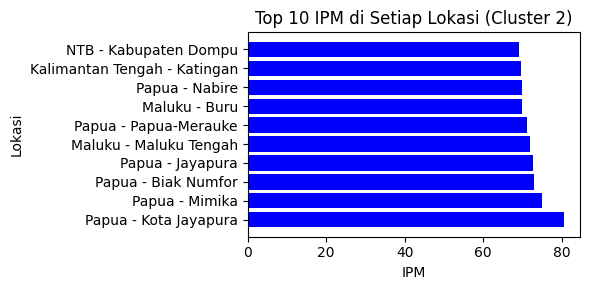

,Provinsi,Kota/Kabupaten,IPM
28,Papua,Kota Jayapura,80.61
8,Papua,Mimika,75.08
5,Papua,Biak Numfor,72.85
2,Papua,Jayapura,72.67
232,Maluku,Maluku Tengah,71.81


In [ ]:
Top_c2 = cluster2.nlargest(10, 'IPM')[['Provinsi', 'Kota/Kabupaten', 'IPM']]
plt.figure(figsize=(6, 3))
plt.barh(Top_c2['Provinsi'] + ' - ' + Top_c2['Kota/Kabupaten'], Top_c2['IPM'], color='blue')
plt.ylabel('Lokasi')
plt.xlabel('IPM')
plt.title('Top 10 IPM di Setiap Lokasi (Cluster 2)')
plt.tight_layout()
plt.show()

Top_c2.head()

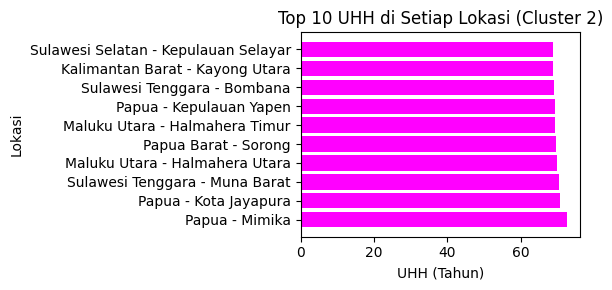

,Provinsi,Kota/Kabupaten,UHH (Tahun)
8,Papua,Mimika,72.57
28,Papua,Kota Jayapura,70.76
60,Sulawesi Tenggara,Muna Barat,70.39
224,Maluku Utara,Halmahera Utara,69.88
35,Papua Barat,Sorong,69.57


In [ ]:
Top_c2 = cluster2.nlargest(10, 'UHH (Tahun)')[['Provinsi', 'Kota/Kabupaten', 'UHH (Tahun)']]
plt.figure(figsize=(6, 3))
plt.barh(Top_c2['Provinsi'] + ' - ' + Top_c2['Kota/Kabupaten'], Top_c2['UHH (Tahun)'], color='magenta')
plt.ylabel('Lokasi')
plt.xlabel('UHH (Tahun)')
plt.title('Top 10 UHH di Setiap Lokasi (Cluster 2)')
plt.tight_layout()
plt.show()

Top_c2.head()

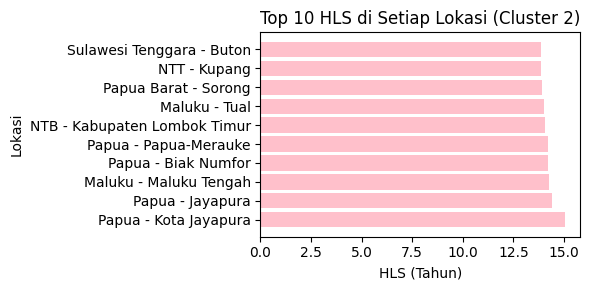

,Provinsi,Kota/Kabupaten,HLS (Tahun)
28,Papua,Kota Jayapura,15.04
2,Papua,Jayapura,14.40
232,Maluku,Maluku Tengah,14.28
5,Papua,Biak Numfor,14.21
0,Papua,Papua-Merauke,14.20


In [ ]:
# Visualisasi
Top_c2 = cluster2.nlargest(10, 'HLS (Tahun)')[['Provinsi', 'Kota/Kabupaten', 'HLS (Tahun)']]
plt.figure(figsize=(6, 3))
plt.barh(Top_c2['Provinsi'] + ' - ' + Top_c2['Kota/Kabupaten'], Top_c2['HLS (Tahun)'], color='pink')
plt.ylabel('Lokasi')
plt.xlabel('HLS (Tahun)')
plt.title('Top 10 HLS di Setiap Lokasi (Cluster 2)')
plt.tight_layout()
plt.show()

Top_c2.head()

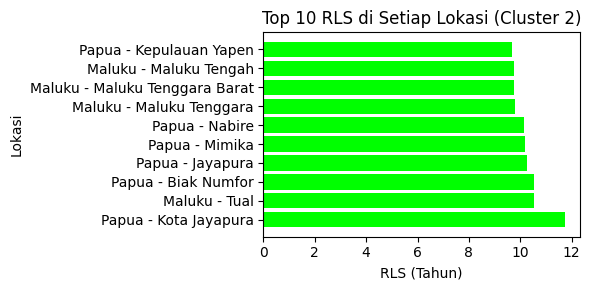

,Provinsi,Kota/Kabupaten,RLS (Tahun)
28,Papua,Kota Jayapura,11.74
240,Maluku,Tual,10.54
5,Papua,Biak Numfor,10.53
2,Papua,Jayapura,10.27
8,Papua,Mimika,10.20


In [ ]:
Top_c2 = cluster2.nlargest(10, 'RLS (Tahun)')[['Provinsi', 'Kota/Kabupaten', 'RLS (Tahun)']]
plt.figure(figsize=(6, 3))
plt.barh(Top_c2['Provinsi'] + ' - ' + Top_c2['Kota/Kabupaten'], Top_c2['RLS (Tahun)'], color='lime')
plt.ylabel('Lokasi')
plt.xlabel('RLS (Tahun)')
plt.title('Top 10 RLS di Setiap Lokasi (Cluster 2)')
plt.tight_layout()
plt.show()

Top_c2.head()

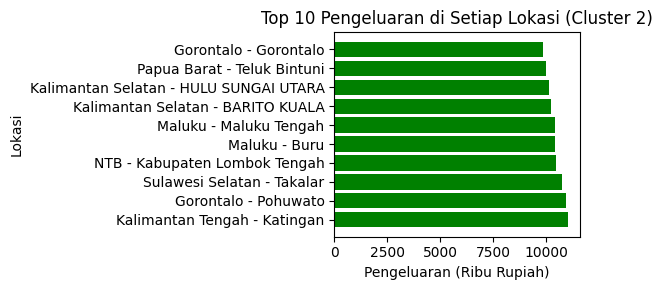

,Provinsi,Kota/Kabupaten,Pengeluaran (Ribu Rupiah)
173,Kalimantan Tengah,Katingan,11036.0
119,Gorontalo,Pohuwato,10913.0
69,Sulawesi Selatan,Takalar,10746.0
211,NTB,Kabupaten Lombok Tengah,10470.0
233,Maluku,Buru,10414.0


In [ ]:
Top_c2 = cluster2.nlargest(10, 'Pengeluaran (Ribu Rupiah)')[['Provinsi', 'Kota/Kabupaten', 'Pengeluaran (Ribu Rupiah)']]
plt.figure(figsize=(6, 3))
plt.barh(Top_c2['Provinsi'] + ' - ' + Top_c2['Kota/Kabupaten'], Top_c2['Pengeluaran (Ribu Rupiah)'], color='green')
plt.ylabel('Lokasi')
plt.xlabel('Pengeluaran (Ribu Rupiah)')
plt.title('Top 10 Pengeluaran di Setiap Lokasi (Cluster 2)')
plt.tight_layout()
plt.show()

Top_c2.head()

### **cluster 3**

In [ ]:
cluster3 = df1.loc[df1['label'] == 2, ['Provinsi', 'Kota/Kabupaten', 'IPM', 'UHH (Tahun)', 'HLS (Tahun)', 'RLS (Tahun)', 'Pengeluaran (Ribu Rupiah)', 'Kategori IPM','label']]
cluster3

,Provinsi,Kota/Kabupaten,IPM,UHH (Tahun),HLS (Tahun),RLS (Tahun),Pengeluaran (Ribu Rupiah),Kategori IPM,label
42,Sulawesi Barat,Majene,67.84,62.16,9.10,13.63,10152.0,Sedang,2
43,Sulawesi Barat,Polewali Mandar,64.79,62.86,7.60,13.39,8726.0,Sedang,2
44,Sulawesi Barat,Mamasa,67.21,71.20,8.00,12.53,7837.0,Sedang,2
45,Sulawesi Barat,Mamuju,68.88,68.21,8.09,13.25,9668.0,Sedang,2
46,Sulawesi Barat,Pasangkayu,68.61,66.90,8.11,12.06,11330.0,Sedang,2
47,Sulawesi Barat,Mamuju Tengah,66.89,68.97,7.61,12.65,8633.0,Sedang,2
89,Sulawesi Tengah,Banggai Kepulauan,66.08,66.73,8.46,13.08,7712.0,Sedang,2
90,Sulawesi Tengah,Banggai,71.08,70.88,8.54,13.34,9963.0,Tinggi,2
91,Sulawesi Tengah,Morowali,72.55,69.23,9.35,13.36,11291.0,Tinggi,2
92,Sulawesi Tengah,Poso,71.93,71.19,9.52,13.72,9218.0,Tinggi,2


In [ ]:
# Menghapus kolom Provinsi
c2 = cluster2.drop(columns=['Provinsi'])

# Menampilkan deskripsi statistik
print("Statistik Deskriptif:")
display(c2.describe())

# Identifikasi jumlah kota/kabupaten dalam setiap provinsi
print("\nJumlah Kota/Kabupaten dalam Setiap Provinsi: ")
display(cluster2['Provinsi'].value_counts())

Statistik Deskriptif:


,IPM,UHH (Tahun),HLS (Tahun),RLS (Tahun),Pengeluaran (Ribu Rupiah),label
count,87.00000,87.000000,87.000000,87.000000,87.000000,87.0
mean,65.98069,66.788851,12.955057,8.119195,7138.239575,1.0
std,3.61185,2.115005,0.659508,1.144407,3043.846152,0.0
min,54.63000,60.060000,11.690000,5.340000,5.904000,1.0
25%,64.23500,65.575000,12.450000,7.370000,6591.000000,1.0
50%,66.06000,67.040000,12.900000,8.090000,7670.000000,1.0
75%,67.76000,67.970000,13.250000,8.755000,9281.000000,1.0
max,80.61000,72.570000,15.040000,11.740000,11036.000000,1.0



Jumlah Kota/Kabupaten dalam Setiap Provinsi: 


Provinsi
NTT                   21
Papua                 11
Papua Barat           10
Maluku                10
Maluku Utara           8
Sulawesi Tenggara      6
NTB                    6
Sulawesi Selatan       5
Sulawesi Utara         3
Gorontalo              3
Kalimantan Selatan     2
Kalimantan Barat       1
Kalimantan Tengah      1
Name: count, dtype: int64

In [ ]:
# Menghitung banyaknya tiap kategori dalam cluster 1
kategori_counts = cluster3['Kategori IPM'].value_counts()

# Menghitung rata-rata IPM di cluster 1
rata_rata_ipm = cluster3['IPM'].mean()

# Menampilkan hasil
print("Banyaknya tiap kategori dalam cluster 3:")
print(kategori_counts)
print("\nRata-rata IPM di cluster 3:")
print(rata_rata_ipm)

Banyaknya tiap kategori dalam cluster 3:
Kategori IPM
Sedang           15
Tinggi            3
Sangat Tinggi     1
Name: count, dtype: int64

Rata-rata IPM di cluster 3:
68.71842105263158


Karena rata"nya  68,71 maka termasuk kategori sedang sehingga masih perlu dianalisis lebih lanjut untuk mengetahui strategi apa yang diperlukan agar cluster 3 tidak lagi termasuk kategori IPM sedang sehingga kesejahteraan di setiap daerah dapat merata

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import statsmodels.api as sm

# Variabel independen dan dependen
X = cluster3[['UHH (Tahun)', 'HLS (Tahun)', 'RLS (Tahun)', 'Pengeluaran (Ribu Rupiah)']]
Y = cluster3['IPM']

# Menambahkan konstanta
X = sm.add_constant(X)

# Model regresi linier
model = sm.OLS(Y, X).fit()

# Hasil regresi
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    IPM   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1636.
Date:                Mon, 10 Jun 2024   Prob (F-statistic):           1.61e-18
Time:                        15:34:24   Log-Likelihood:                 6.2878
No. Observations:                  19   AIC:                            -2.576
Df Residuals:                      14   BIC:                             2.147
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Menambahkan konstanta ke X lagi
X = sm.add_constant(cluster3[['UHH (Tahun)', 'HLS (Tahun)', 'RLS (Tahun)', 'Pengeluaran (Ribu Rupiah)']])

# Menghitung VIF
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

                   variables         VIF
0                      const  968.001350
1                UHH (Tahun)    1.248587
2                HLS (Tahun)    4.327941
3                RLS (Tahun)    3.930334
4  Pengeluaran (Ribu Rupiah)    2.094490


**Interpretasi**

Berdasarkan hasil regresi dan analisis variabel di atas, dapat disimpulkan bahwa Variabel yang paling berpengaruh pada IPM adalah HLS (Harapan Lama Sekolah), diikuti oleh RLS (Rata-rata Lama Sekolah), UHH (Umur Harapan Hidup), dan terakhir Pengeluaran per Kapita. Sehingga untuk meningkatkan IPM secara keseluruhan, fokus utama harus pada peningkatan durasi pendidikan (baik HLS maupun RLS) serta meningkatkan layanan kesehatan untuk meningkatkan UHH. Pengeluaran per kapita juga penting, tetapi dampaknya lebih kecil dibandingkan variabel lainnya.

#### **Melakukan Identivikasi pada Variabel di Kab/kota pada cluster 3**

In [ ]:
# 10 Kota/Kabupaten dengan tingkat UHH tertinggi
top10_UHH = cluster3.nlargest(10, 'UHH (Tahun)')[['Provinsi', 'Kota/Kabupaten', 'UHH (Tahun)']]
# 10 Kota/Kabupaten dengan tingkat UHH terendah
bottom10_UHH = cluster3.nsmallest(10, 'UHH (Tahun)')[['Provinsi', 'Kota/Kabupaten', 'UHH (Tahun)']]

print("\n 10 Kota/Kabupaten dengan Tingkat Umur Harapan Hidup Tertinggi: ")
display(top10_UHH)
print("\n10 Kota/Kabupaten dengan Tingkat Umur Harapan Hidup Terendah :")
display(bottom10_UHH)


 10 Kota/Kabupaten dengan Tingkat Umur Harapan Hidup Tertinggi: 


,Provinsi,Kota/Kabupaten,UHH (Tahun)
44,Sulawesi Barat,Mamasa,71.20
101,Sulawesi Tengah,Kota Palu,71.20
92,Sulawesi Tengah,Poso,71.19
90,Sulawesi Tengah,Banggai,70.88
98,Sulawesi Tengah,Sigi,70.15
100,Sulawesi Tengah,Morowali Utara,69.77
95,Sulawesi Tengah,Buol,69.32
91,Sulawesi Tengah,Morowali,69.23
47,Sulawesi Barat,Mamuju Tengah,68.97
45,Sulawesi Barat,Mamuju,68.21



10 Kota/Kabupaten dengan Tingkat Umur Harapan Hidup Terendah :


,Provinsi,Kota/Kabupaten,UHH (Tahun)
42,Sulawesi Barat,Majene,62.16
43,Sulawesi Barat,Polewali Mandar,62.86
96,Sulawesi Tengah,Parigi Moutong,64.35
99,Sulawesi Tengah,Banggai Laut,65.81
97,Sulawesi Tengah,Tojo Una-una,66.08
94,Sulawesi Tengah,Tolitoli,66.41
89,Sulawesi Tengah,Banggai Kepulauan,66.73
46,Sulawesi Barat,Pasangkayu,66.90
93,Sulawesi Tengah,Donggala,67.61
45,Sulawesi Barat,Mamuju,68.21


In [ ]:
top10 = cluster3.nlargest(5, 'HLS (Tahun)')[['Provinsi', 'Kota/Kabupaten', 'IPM', 'HLS (Tahun)']]
bottom10 = cluster3.nsmallest(5, 'HLS (Tahun)')[['Provinsi', 'Kota/Kabupaten', 'IPM', 'HLS (Tahun)']]

print("\n10 Kota/Kabupaten dengan Tingkat Harapan Lama Sekolah Tertinggi pada Cluster 3: ")
display(top10)
print("\n10 Kota/Kabupaten dengan Tingkat Harapan Lama Sekolah Terendah pada Cluster 3: ")
display(bottom10)


10 Kota/Kabupaten dengan Tingkat Harapan Lama Sekolah Tertinggi pada Cluster 3: 


,Provinsi,Kota/Kabupaten,IPM,HLS (Tahun)
101,Sulawesi Tengah,Kota Palu,82.02,11.73
92,Sulawesi Tengah,Poso,71.93,9.52
91,Sulawesi Tengah,Morowali,72.55,9.35
42,Sulawesi Barat,Majene,67.84,9.10
95,Sulawesi Tengah,Buol,68.72,9.08



10 Kota/Kabupaten dengan Tingkat Harapan Lama Sekolah Terendah pada Cluster 3: 


,Provinsi,Kota/Kabupaten,IPM,HLS (Tahun)
43,Sulawesi Barat,Polewali Mandar,64.79,7.60
47,Sulawesi Barat,Mamuju Tengah,66.89,7.61
96,Sulawesi Tengah,Parigi Moutong,66.26,7.77
93,Sulawesi Tengah,Donggala,66.25,7.98
44,Sulawesi Barat,Mamasa,67.21,8.00


In [ ]:
top10 = cluster3.nlargest(5, 'RLS (Tahun)')[['Provinsi', 'Kota/Kabupaten', 'IPM', 'RLS (Tahun)']]
bottom10 = cluster3.nsmallest(5, 'RLS (Tahun)')[['Provinsi', 'Kota/Kabupaten', 'IPM', 'RLS (Tahun)']]

print("\n10 Kota/Kabupaten dengan Tingkat Tingginya Rata rata Lama Sekolah pada Cluster 3: ")
display(top10)
print("\n10 Kota/Kabupaten dengan Tingkat Rendahnya Rata rata Lama Sekolah pada Cluster 3: ")
display(bottom10)


10 Kota/Kabupaten dengan Tingkat Tingginya Rata rata Lama Sekolah pada Cluster 3: 


,Provinsi,Kota/Kabupaten,IPM,RLS (Tahun)
101,Sulawesi Tengah,Kota Palu,82.02,16.36
92,Sulawesi Tengah,Poso,71.93,13.72
42,Sulawesi Barat,Majene,67.84,13.63
43,Sulawesi Barat,Polewali Mandar,64.79,13.39
91,Sulawesi Tengah,Morowali,72.55,13.36



10 Kota/Kabupaten dengan Tingkat Rendahnya Rata rata Lama Sekolah pada Cluster 3: 


,Provinsi,Kota/Kabupaten,IPM,RLS (Tahun)
46,Sulawesi Barat,Pasangkayu,68.61,12.06
100,Sulawesi Tengah,Morowali Utara,68.97,12.28
97,Sulawesi Tengah,Tojo Una-una,65.54,12.36
96,Sulawesi Tengah,Parigi Moutong,66.26,12.50
44,Sulawesi Barat,Mamasa,67.21,12.53


In [ ]:
top10 = cluster3.nlargest(5, 'Pengeluaran (Ribu Rupiah)')[['Provinsi', 'Kota/Kabupaten', 'IPM', 'Pengeluaran (Ribu Rupiah)']]
bottom10 = cluster3.nsmallest(5, 'Pengeluaran (Ribu Rupiah)')[['Provinsi', 'Kota/Kabupaten', 'IPM', 'Pengeluaran (Ribu Rupiah)']]

print("\n10 Kota/Kabupaten dengan Tingkat Pengeluaran Tertinggi pada Cluster 3: ")
display(top10)
print("\n10 Kota/Kabupaten dengan Tingkat Pengeluaran Terendah pada Cluster 3: ")
display(bottom10)


10 Kota/Kabupaten dengan Tingkat Pengeluaran Tertinggi pada Cluster 3: 


,Provinsi,Kota/Kabupaten,IPM,Pengeluaran (Ribu Rupiah)
101,Sulawesi Tengah,Kota Palu,82.02,15162.0
46,Sulawesi Barat,Pasangkayu,68.61,11330.0
91,Sulawesi Tengah,Morowali,72.55,11291.0
42,Sulawesi Barat,Majene,67.84,10152.0
96,Sulawesi Tengah,Parigi Moutong,66.26,10063.0



10 Kota/Kabupaten dengan Tingkat Pengeluaran Terendah pada Cluster 3: 


,Provinsi,Kota/Kabupaten,IPM,Pengeluaran (Ribu Rupiah)
89,Sulawesi Tengah,Banggai Kepulauan,66.08,7712.0
44,Sulawesi Barat,Mamasa,67.21,7837.0
99,Sulawesi Tengah,Banggai Laut,66.22,8037.0
97,Sulawesi Tengah,Tojo Una-una,65.54,8096.0
95,Sulawesi Tengah,Buol,68.72,8176.0


In [ ]:
top10 = cluster3.nlargest(5, 'IPM')[['Provinsi', 'Kota/Kabupaten', 'IPM', 'UHH (Tahun)', 'HLS (Tahun)', 'RLS (Tahun)', 'Pengeluaran (Ribu Rupiah)']]
bottom10 = cluster3.nsmallest(5, 'IPM')[['Provinsi', 'Kota/Kabupaten', 'IPM', 'UHH (Tahun)', 'HLS (Tahun)', 'RLS (Tahun)', 'Pengeluaran (Ribu Rupiah)']]

print("\n10 Kota/Kabupaten dengan Tingkat IPM Tertinggi pada Cluster 3: ")
display(top10)
print("\n10 Kota/Kabupaten dengan Tingkat IPM Terendah pada Cluster 3: ")
display(bottom10)


10 Kota/Kabupaten dengan Tingkat IPM Tertinggi pada Cluster 3: 


,Provinsi,Kota/Kabupaten,IPM,UHH (Tahun),HLS (Tahun),RLS (Tahun),Pengeluaran (Ribu Rupiah)
101,Sulawesi Tengah,Kota Palu,82.02,71.20,11.73,16.36,15162.0
91,Sulawesi Tengah,Morowali,72.55,69.23,9.35,13.36,11291.0
92,Sulawesi Tengah,Poso,71.93,71.19,9.52,13.72,9218.0
90,Sulawesi Tengah,Banggai,71.08,70.88,8.54,13.34,9963.0
98,Sulawesi Tengah,Sigi,69.05,70.15,8.84,12.97,8498.0



10 Kota/Kabupaten dengan Tingkat IPM Terendah pada Cluster 3: 


,Provinsi,Kota/Kabupaten,IPM,UHH (Tahun),HLS (Tahun),RLS (Tahun),Pengeluaran (Ribu Rupiah)
43,Sulawesi Barat,Polewali Mandar,64.79,62.86,7.60,13.39,8726.0
97,Sulawesi Tengah,Tojo Una-una,65.54,66.08,8.41,12.36,8096.0
89,Sulawesi Tengah,Banggai Kepulauan,66.08,66.73,8.46,13.08,7712.0
99,Sulawesi Tengah,Banggai Laut,66.22,65.81,8.63,13.02,8037.0
93,Sulawesi Tengah,Donggala,66.25,67.61,7.98,12.60,8303.0


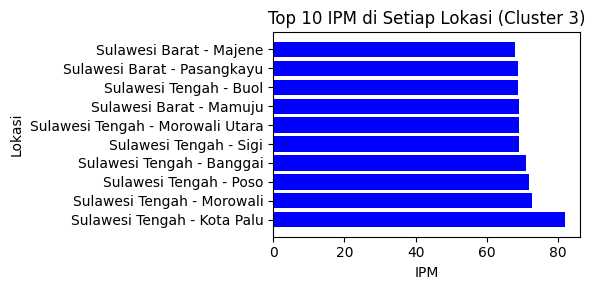

,Provinsi,Kota/Kabupaten,IPM
101,Sulawesi Tengah,Kota Palu,82.02
91,Sulawesi Tengah,Morowali,72.55
92,Sulawesi Tengah,Poso,71.93
90,Sulawesi Tengah,Banggai,71.08
98,Sulawesi Tengah,Sigi,69.05


In [ ]:
Top_c3 = cluster3.nlargest(10, 'IPM')[['Provinsi', 'Kota/Kabupaten', 'IPM']]
plt.figure(figsize=(6, 3))
plt.barh(Top_c3['Provinsi'] + ' - ' + Top_c3['Kota/Kabupaten'], Top_c3['IPM'], color='blue')
plt.ylabel('Lokasi')
plt.xlabel('IPM')
plt.title('Top 10 IPM di Setiap Lokasi (Cluster 3)')
plt.tight_layout()
plt.show()

Top_c3.head()

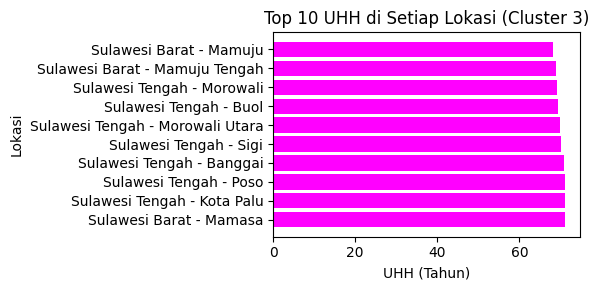

,Provinsi,Kota/Kabupaten,UHH (Tahun)
44,Sulawesi Barat,Mamasa,71.20
101,Sulawesi Tengah,Kota Palu,71.20
92,Sulawesi Tengah,Poso,71.19
90,Sulawesi Tengah,Banggai,70.88
98,Sulawesi Tengah,Sigi,70.15


In [ ]:
# Visualisasi UHH
Top_c3 = cluster3.nlargest(10, 'UHH (Tahun)')[['Provinsi', 'Kota/Kabupaten', 'UHH (Tahun)']]
plt.figure(figsize=(6, 3))
plt.barh(Top_c3['Provinsi'] + ' - ' + Top_c3['Kota/Kabupaten'], Top_c3['UHH (Tahun)'], color='magenta')
plt.ylabel('Lokasi')
plt.xlabel('UHH (Tahun)')
plt.title('Top 10 UHH di Setiap Lokasi (Cluster 3)')
plt.tight_layout()
plt.show()

Top_c3.head()

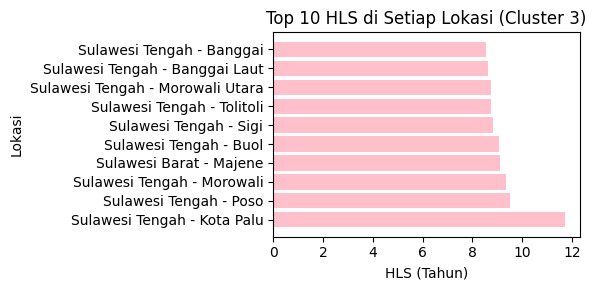

,Provinsi,Kota/Kabupaten,HLS (Tahun)
101,Sulawesi Tengah,Kota Palu,11.73
92,Sulawesi Tengah,Poso,9.52
91,Sulawesi Tengah,Morowali,9.35
42,Sulawesi Barat,Majene,9.10
95,Sulawesi Tengah,Buol,9.08


In [ ]:
# Visualisasi HLS
Top_c3 = cluster3.nlargest(10, 'HLS (Tahun)')[['Provinsi', 'Kota/Kabupaten', 'HLS (Tahun)']]
plt.figure(figsize=(6, 3))
plt.barh(Top_c3['Provinsi'] + ' - ' + Top_c3['Kota/Kabupaten'], Top_c3['HLS (Tahun)'], color='pink')
plt.ylabel('Lokasi')
plt.xlabel('HLS (Tahun)')
plt.title('Top 10 HLS di Setiap Lokasi (Cluster 3)')
plt.tight_layout()
plt.show()

Top_c3.head()

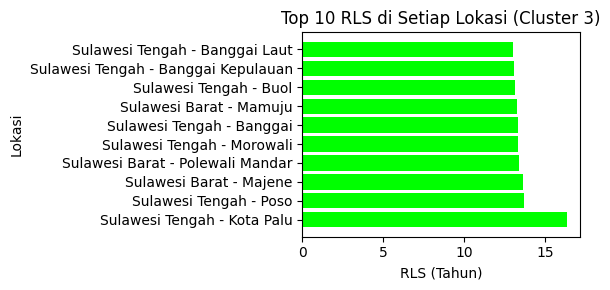

,Provinsi,Kota/Kabupaten,RLS (Tahun)
101,Sulawesi Tengah,Kota Palu,16.36
92,Sulawesi Tengah,Poso,13.72
42,Sulawesi Barat,Majene,13.63
43,Sulawesi Barat,Polewali Mandar,13.39
91,Sulawesi Tengah,Morowali,13.36


In [ ]:
# Visualisasi RLS
Top_c3 = cluster3.nlargest(10, 'RLS (Tahun)')[['Provinsi', 'Kota/Kabupaten', 'RLS (Tahun)']]
plt.figure(figsize=(6, 3))
plt.barh(Top_c3['Provinsi'] + ' - ' + Top_c3['Kota/Kabupaten'], Top_c3['RLS (Tahun)'], color='lime')
plt.ylabel('Lokasi')
plt.xlabel('RLS (Tahun)')
plt.title('Top 10 RLS di Setiap Lokasi (Cluster 3)')
plt.tight_layout()
plt.show()

Top_c3.head()

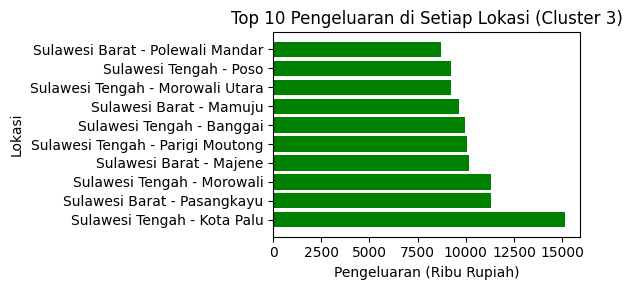

,Provinsi,Kota/Kabupaten,Pengeluaran (Ribu Rupiah)
101,Sulawesi Tengah,Kota Palu,15162.0
46,Sulawesi Barat,Pasangkayu,11330.0
91,Sulawesi Tengah,Morowali,11291.0
42,Sulawesi Barat,Majene,10152.0
96,Sulawesi Tengah,Parigi Moutong,10063.0


In [ ]:
# Visualisasi Pengeluaran
Top_c3 = cluster3.nlargest(10, 'Pengeluaran (Ribu Rupiah)')[['Provinsi', 'Kota/Kabupaten', 'Pengeluaran (Ribu Rupiah)']]
plt.figure(figsize=(6, 3))
plt.barh(Top_c3['Provinsi'] + ' - ' + Top_c3['Kota/Kabupaten'], Top_c3['Pengeluaran (Ribu Rupiah)'], color='green')
plt.ylabel('Lokasi')
plt.xlabel('Pengeluaran (Ribu Rupiah)')
plt.title('Top 10 Pengeluaran di Setiap Lokasi (Cluster 3)')
plt.tight_layout()
plt.show()

Top_c3.head()

#### **Cluster 4**

In [ ]:
cluster4 = df1.loc[df1['label'] == 3, ['Provinsi', 'Kota/Kabupaten', 'IPM', 'UHH (Tahun)', 'HLS (Tahun)', 'RLS (Tahun)', 'Pengeluaran (Ribu Rupiah)', 'Kategori IPM','label']]
cluster4

,Provinsi,Kota/Kabupaten,IPM,UHH (Tahun),HLS (Tahun),RLS (Tahun),Pengeluaran (Ribu Rupiah),Kategori IPM,label
1,Papua,Jayawijaya,59.60,60.26,12.83,5.74,7.765,Rendah,3
6,Papua,Paniai,57.14,66.94,10.52,4.78,6.554,Rendah,3
7,Papua,Puncak Jaya,49.84,65.66,7.50,4.03,5.422,Rendah,3
9,Papua,Boven Digoel,62.52,60.64,11.27,9.03,8.086,Sedang,3
10,Papua,Mappi,59.61,65.66,10.84,6.78,6.550,Rendah,3
11,Papua,Asmat,52.22,58.90,9.49,5.36,5.860,Rendah,3
12,Papua,Yahukimo,50.25,66.31,7.80,4.28,5.101,Rendah,3
13,Papua,Pegunungan Bintang,47.21,64.79,6.59,3.23,5.618,Rendah,3
14,Papua,Tolikara,50.51,66.08,8.83,3.67,5.079,Rendah,3
19,Papua,Mamberamo Raya,53.10,58.29,11.82,6.12,4.806,Rendah,3


In [ ]:
cluster4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 1 to 27
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Provinsi                   18 non-null     object 
 1   Kota/Kabupaten             18 non-null     object 
 2   IPM                        18 non-null     float64
 3   UHH (Tahun)                18 non-null     float64
 4   HLS (Tahun)                18 non-null     float64
 5   RLS (Tahun)                18 non-null     float64
 6   Pengeluaran (Ribu Rupiah)  18 non-null     float64
 7   Kategori IPM               18 non-null     object 
 8   label                      18 non-null     int32  
dtypes: float64(5), int32(1), object(3)
memory usage: 1.3+ KB


In [ ]:
c4 = cluster4.drop(columns=['Provinsi'])  # Menghapus kolom 'Provinsi'

# Menampilkan deskripsi statistik
print("Statistik Deskriptif:")
display(c4.describe())

# Identifikasi jumlah kota/kabupaten dalam setiap provinsi
print("\nJumlah Kota/Kabupaten dalam Setiap Provinsi: ")
display(cluster4['Provinsi'].value_counts())

Statistik Deskriptif:


,IPM,UHH (Tahun),HLS (Tahun),RLS (Tahun),Pengeluaran (Ribu Rupiah),label
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.0
mean,51.340556,63.842222,9.070556,4.361667,5.596778,3.0
std,6.449470,3.435335,2.231645,1.778179,1.063263,0.0
min,34.100000,55.700000,4.070000,1.580000,4.190000,3.0
25%,49.342500,61.492500,7.702500,3.260000,4.806500,3.0
50%,50.335000,65.660000,9.465000,3.850000,5.502500,3.0
75%,55.065000,66.117500,10.587500,5.260000,5.821250,3.0
max,62.520000,66.940000,12.830000,9.030000,8.086000,3.0



Jumlah Kota/Kabupaten dalam Setiap Provinsi: 


Provinsi
Papua    18
Name: count, dtype: int64

In [ ]:
# Menghitung banyaknya tiap kategori dalam cluster 1
kategori_counts = cluster4['Kategori IPM'].value_counts()

# Menghitung rata-rata IPM di cluster 1
rata_rata_ipm = cluster4['IPM'].mean()

# Menampilkan hasil
print("Banyaknya tiap kategori dalam cluster 4:")
print(kategori_counts)
print("\nRata-rata IPM di cluster 4:")
print(rata_rata_ipm)

Banyaknya tiap kategori dalam cluster 4:
Kategori IPM
Rendah    17
Sedang     1
Name: count, dtype: int64

Rata-rata IPM di cluster 4:
51.340555555555554


Karena rata"nya  51,34 maka termasuk kategori rendah sehingga perlu dianalisis lebih lanjut untuk mengetahui strategi apa yang diperlukan agar cluster 4 tidak lagi mtermasuk kategori IPM rendah

In [ ]:
# Variabel independen dan dependen
X = cluster4[['UHH (Tahun)', 'HLS (Tahun)', 'RLS (Tahun)', 'Pengeluaran (Ribu Rupiah)']]
Y = cluster4['IPM']

# Menambahkan konstanta
X = sm.add_constant(X)

# Model regresi linier
model = sm.OLS(Y, X).fit()

# Hasil regresi
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    IPM   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     810.8
Date:                Mon, 10 Jun 2024   Prob (F-statistic):           1.91e-15
Time:                        15:34:26   Log-Likelihood:                -8.8676
No. Observations:                  18   AIC:                             27.74
Df Residuals:                      13   BIC:                             32.19
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Menambahkan konstanta ke X lagi
X = sm.add_constant(cluster4[['UHH (Tahun)', 'HLS (Tahun)', 'RLS (Tahun)', 'Pengeluaran (Ribu Rupiah)']])

# Menghitung VIF
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)


                   variables         VIF
0                      const  419.434787
1                UHH (Tahun)    1.122867
2                HLS (Tahun)    2.553641
3                RLS (Tahun)    4.393429
4  Pengeluaran (Ribu Rupiah)    2.345195


**Interpretasi**

Berdasarkan hasil regresi linier dan analisis variabel, diketahui bahwa semua varibel berpengaruh dalam peningkatan IPM. Variabel yang paling mempengaruhi IPM adalah Pengeluaran, hal ini karena variabel pengeluaran memiliki koefisien terbesar (1.4715), diikuti oleh RLS (Tahun) (1.4552), HLS (Tahun) (1.3355), dan UHH (Tahun) (0.5252). Selain itu juga semua variabel bernilai positif, sehingga semua variabel perlu ditingkatkan terutama Pengeluaran per kapita. Karena variabel Pengeluaran per kapita menunjukkan dampak terbesar, jadi alokasi anggaran dan sumber daya untuk meningkatkan standar hidup dan ekonomi masyarakat harus menjadi prioritas utama. Selanjutnya, peningkatan akses seperti layanan kesehaatan ,dan kualitas pendidikan juga harus diutamakan karena variabel RLS dan HLS juga menunjukkan pengaruh besar terhadap IPM.

In [ ]:
top10 = cluster4.nlargest(5, 'UHH (Tahun)')[['Provinsi', 'Kota/Kabupaten', 'IPM', 'UHH (Tahun)']]
bottom10 = cluster4.nsmallest(5, 'UHH (Tahun)')[['Provinsi', 'Kota/Kabupaten', 'IPM', 'UHH (Tahun)']]

print("\n10 Kota/Kabupaten dengan Tingkat Umur Harapan Hidup Tertinggi pada Cluster 4: ")
display(top10)
print("\n10 Kota/Kabupaten dengan Tingkat Umur Harapan Hidup Terendah pada Cluster 4: ")
display(bottom10)


10 Kota/Kabupaten dengan Tingkat Umur Harapan Hidup Tertinggi pada Cluster 4: 


,Provinsi,Kota/Kabupaten,IPM,UHH (Tahun)
6,Papua,Paniai,57.14,66.94
12,Papua,Yahukimo,50.25,66.31
21,Papua,Lanny Jaya,49.62,66.31
24,Papua,Puncak,43.87,66.13
25,Papua,Dogiyai,55.72,66.13



10 Kota/Kabupaten dengan Tingkat Umur Harapan Hidup Terendah pada Cluster 4: 


,Provinsi,Kota/Kabupaten,IPM,UHH (Tahun)
20,Papua,Nduga,34.10,55.70
19,Papua,Mamberamo Raya,53.10,58.29
11,Papua,Asmat,52.22,58.90
1,Papua,Jayawijaya,59.60,60.26
9,Papua,Boven Digoel,62.52,60.64


In [ ]:
top10 = cluster4.nlargest(5, 'HLS (Tahun)')[['Provinsi', 'Kota/Kabupaten', 'IPM', 'HLS (Tahun)']]
bottom10 = cluster4.nsmallest(5, 'HLS (Tahun)')[['Provinsi', 'Kota/Kabupaten', 'IPM', 'HLS (Tahun)']]

print("\n10 Kota/Kabupaten dengan Tingkat Harapan Lama Sekolah Tertinggi pada Cluster 4: ")
display(top10)
print("\n10 Kota/Kabupaten dengan Tingkat Harapan Lama Sekolah Terendah pada Cluster 4: ")
display(bottom10)


10 Kota/Kabupaten dengan Tingkat Harapan Lama Sekolah Tertinggi pada Cluster 4: 


,Provinsi,Kota/Kabupaten,IPM,HLS (Tahun)
1,Papua,Jayawijaya,59.60,12.83
19,Papua,Mamberamo Raya,53.10,11.82
9,Papua,Boven Digoel,62.52,11.27
10,Papua,Mappi,59.61,10.84
25,Papua,Dogiyai,55.72,10.61



10 Kota/Kabupaten dengan Tingkat Harapan Lama Sekolah Terendah pada Cluster 4: 


,Provinsi,Kota/Kabupaten,IPM,HLS (Tahun)
20,Papua,Nduga,34.10,4.07
24,Papua,Puncak,43.87,5.58
13,Papua,Pegunungan Bintang,47.21,6.59
7,Papua,Puncak Jaya,49.84,7.50
26,Papua,Intan Jaya,49.25,7.67


In [ ]:
top10 = cluster4.nlargest(5, 'HLS (Tahun)')[['Provinsi', 'Kota/Kabupaten', 'IPM', 'HLS (Tahun)']]
bottom10 = cluster4.nsmallest(5, 'HLS (Tahun)')[['Provinsi', 'Kota/Kabupaten', 'IPM', 'HLS (Tahun)']]

print("\n10 Kota/Kabupaten dengan Tingkat Harapan Lama Sekolah Tertinggi pada Cluster 4: ")
display(top10)
print("\n10 Kota/Kabupaten dengan Tingkat Harapan Lama Sekolah Terendah pada Cluster 4: ")
display(bottom10)


10 Kota/Kabupaten dengan Tingkat Harapan Lama Sekolah Tertinggi pada Cluster 4: 


,Provinsi,Kota/Kabupaten,IPM,HLS (Tahun)
1,Papua,Jayawijaya,59.60,12.83
19,Papua,Mamberamo Raya,53.10,11.82
9,Papua,Boven Digoel,62.52,11.27
10,Papua,Mappi,59.61,10.84
25,Papua,Dogiyai,55.72,10.61



10 Kota/Kabupaten dengan Tingkat Harapan Lama Sekolah Terendah pada Cluster 4: 


,Provinsi,Kota/Kabupaten,IPM,HLS (Tahun)
20,Papua,Nduga,34.10,4.07
24,Papua,Puncak,43.87,5.58
13,Papua,Pegunungan Bintang,47.21,6.59
7,Papua,Puncak Jaya,49.84,7.50
26,Papua,Intan Jaya,49.25,7.67


In [ ]:
top10 = cluster4.nlargest(5, 'RLS (Tahun)')[['Provinsi', 'Kota/Kabupaten', 'IPM', 'RLS (Tahun)']]
bottom10 = cluster4.nsmallest(5, 'RLS (Tahun)')[['Provinsi', 'Kota/Kabupaten', 'IPM', 'RLS (Tahun)']]

print("\n10 Kota/Kabupaten dengan Tingkat Tingginya Rata rata Lama Sekolah pada Cluster 4: ")
display(top10)
print("\n10 Kota/Kabupaten dengan Tingkat Rendahnya Rata rata Lama Sekolah pada Cluster 4: ")
display(bottom10)


10 Kota/Kabupaten dengan Tingkat Tingginya Rata rata Lama Sekolah pada Cluster 4: 


,Provinsi,Kota/Kabupaten,IPM,RLS (Tahun)
9,Papua,Boven Digoel,62.52,9.03
10,Papua,Mappi,59.61,6.78
19,Papua,Mamberamo Raya,53.10,6.12
1,Papua,Jayawijaya,59.60,5.74
11,Papua,Asmat,52.22,5.36



10 Kota/Kabupaten dengan Tingkat Rendahnya Rata rata Lama Sekolah pada Cluster 4: 


,Provinsi,Kota/Kabupaten,IPM,RLS (Tahun)
20,Papua,Nduga,34.10,1.58
24,Papua,Puncak,43.87,2.17
23,Papua,Yalimo,49.90,3.19
13,Papua,Pegunungan Bintang,47.21,3.23
26,Papua,Intan Jaya,49.25,3.26


In [ ]:
top10 = cluster4.nlargest(5, 'Pengeluaran (Ribu Rupiah)')[['Provinsi', 'Kota/Kabupaten', 'IPM', 'Pengeluaran (Ribu Rupiah)']]
bottom10 = cluster4.nsmallest(5, 'Pengeluaran (Ribu Rupiah)')[['Provinsi', 'Kota/Kabupaten', 'IPM', 'Pengeluaran (Ribu Rupiah)']]

print("\n10 Kota/Kabupaten dengan Tingkat Pengeluaran Tertinggi pada Cluster 4: ")
display(top10)
print("\n10 Kota/Kabupaten dengan Tingkat Pengeluaran Terendah pada Cluster 4: ")
display(bottom10)


10 Kota/Kabupaten dengan Tingkat Pengeluaran Tertinggi pada Cluster 4: 


,Provinsi,Kota/Kabupaten,IPM,Pengeluaran (Ribu Rupiah)
9,Papua,Boven Digoel,62.52,8.086
1,Papua,Jayawijaya,59.60,7.765
6,Papua,Paniai,57.14,6.554
10,Papua,Mappi,59.61,6.550
11,Papua,Asmat,52.22,5.860



10 Kota/Kabupaten dengan Tingkat Pengeluaran Terendah pada Cluster 4: 


,Provinsi,Kota/Kabupaten,IPM,Pengeluaran (Ribu Rupiah)
20,Papua,Nduga,34.10,4.190
21,Papua,Lanny Jaya,49.62,4.559
22,Papua,Mamberamo Tengah,49.25,4.630
23,Papua,Yalimo,49.90,4.802
19,Papua,Mamberamo Raya,53.10,4.806


In [ ]:
top10 = cluster4.nlargest(5, 'IPM')[['Provinsi', 'Kota/Kabupaten', 'IPM', 'UHH (Tahun)', 'HLS (Tahun)', 'RLS (Tahun)', 'Pengeluaran (Ribu Rupiah)']]
bottom10 = cluster4.nsmallest(5, 'IPM')[['Provinsi', 'Kota/Kabupaten', 'IPM', 'UHH (Tahun)', 'HLS (Tahun)', 'RLS (Tahun)', 'Pengeluaran (Ribu Rupiah)']]

print("\n10 Kota/Kabupaten dengan Tingkat IPM Tertinggi pada Cluster 4: ")
display(top10)
print("\n10 Kota/Kabupaten dengan Tingkat IPM Terendah pada Cluster 4: ")
display(bottom10)



10 Kota/Kabupaten dengan Tingkat IPM Tertinggi pada Cluster 4: 


,Provinsi,Kota/Kabupaten,IPM,UHH (Tahun),HLS (Tahun),RLS (Tahun),Pengeluaran (Ribu Rupiah)
9,Papua,Boven Digoel,62.52,60.64,11.27,9.03,8.086
10,Papua,Mappi,59.61,65.66,10.84,6.78,6.550
1,Papua,Jayawijaya,59.60,60.26,12.83,5.74,7.765
6,Papua,Paniai,57.14,66.94,10.52,4.78,6.554
25,Papua,Dogiyai,55.72,66.13,10.61,4.96,5.705



10 Kota/Kabupaten dengan Tingkat IPM Terendah pada Cluster 4: 


,Provinsi,Kota/Kabupaten,IPM,UHH (Tahun),HLS (Tahun),RLS (Tahun),Pengeluaran (Ribu Rupiah)
20,Papua,Nduga,34.10,55.70,4.07,1.58,4.190
24,Papua,Puncak,43.87,66.13,5.58,2.17,5.583
13,Papua,Pegunungan Bintang,47.21,64.79,6.59,3.23,5.618
22,Papua,Mamberamo Tengah,49.25,64.05,9.44,3.48,4.630
26,Papua,Intan Jaya,49.25,65.93,7.67,3.26,5.624


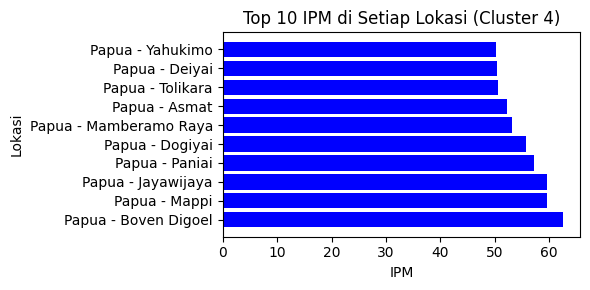

,Provinsi,Kota/Kabupaten,IPM
9,Papua,Boven Digoel,62.52
10,Papua,Mappi,59.61
1,Papua,Jayawijaya,59.60
6,Papua,Paniai,57.14
25,Papua,Dogiyai,55.72


In [ ]:
Top_c4 = cluster4.nlargest(10, 'IPM')[['Provinsi', 'Kota/Kabupaten', 'IPM']]
plt.figure(figsize=(6, 3))
plt.barh(Top_c4['Provinsi'] + ' - ' + Top_c4['Kota/Kabupaten'], Top_c4['IPM'], color='blue')
plt.ylabel('Lokasi')
plt.xlabel('IPM')
plt.title('Top 10 IPM di Setiap Lokasi (Cluster 4)')
plt.tight_layout()
plt.show()

Top_c4.head()

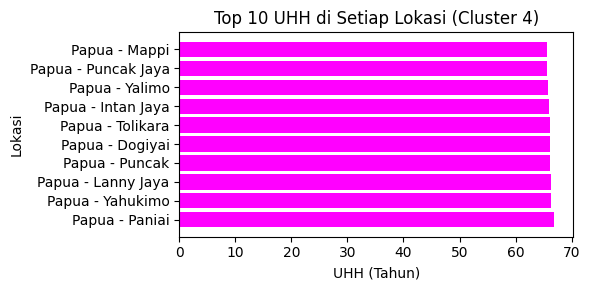

,Provinsi,Kota/Kabupaten,UHH (Tahun)
6,Papua,Paniai,66.94
12,Papua,Yahukimo,66.31
21,Papua,Lanny Jaya,66.31
24,Papua,Puncak,66.13
25,Papua,Dogiyai,66.13


In [ ]:
# Visualisasi UHH
Top_c4 = cluster4.nlargest(10, 'UHH (Tahun)')[['Provinsi', 'Kota/Kabupaten', 'UHH (Tahun)']]
plt.figure(figsize=(6, 3))
plt.barh(Top_c4['Provinsi'] + ' - ' + Top_c4['Kota/Kabupaten'], Top_c4['UHH (Tahun)'], color='magenta')
plt.ylabel('Lokasi')
plt.xlabel('UHH (Tahun)')
plt.title('Top 10 UHH di Setiap Lokasi (Cluster 4)')
plt.tight_layout()
plt.show()

Top_c4.head()

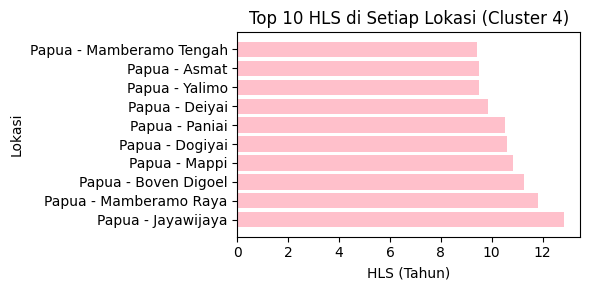

,Provinsi,Kota/Kabupaten,HLS (Tahun)
1,Papua,Jayawijaya,12.83
19,Papua,Mamberamo Raya,11.82
9,Papua,Boven Digoel,11.27
10,Papua,Mappi,10.84
25,Papua,Dogiyai,10.61


In [ ]:
# Visualisasi HLS
Top_c4 = cluster4.nlargest(10, 'HLS (Tahun)')[['Provinsi', 'Kota/Kabupaten', 'HLS (Tahun)']]
plt.figure(figsize=(6, 3))
plt.barh(Top_c4['Provinsi'] + ' - ' + Top_c4['Kota/Kabupaten'], Top_c4['HLS (Tahun)'], color='pink')
plt.ylabel('Lokasi')
plt.xlabel('HLS (Tahun)')
plt.title('Top 10 HLS di Setiap Lokasi (Cluster 4)')
plt.tight_layout()
plt.show()

Top_c4.head()

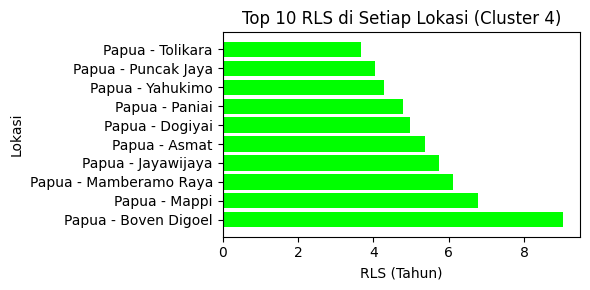

,Provinsi,Kota/Kabupaten,RLS (Tahun)
9,Papua,Boven Digoel,9.03
10,Papua,Mappi,6.78
19,Papua,Mamberamo Raya,6.12
1,Papua,Jayawijaya,5.74
11,Papua,Asmat,5.36


In [ ]:
# Visualisasi RLS
Top_c4 = cluster4.nlargest(10, 'RLS (Tahun)')[['Provinsi', 'Kota/Kabupaten', 'RLS (Tahun)']]
plt.figure(figsize=(6, 3))
plt.barh(Top_c4['Provinsi'] + ' - ' + Top_c4['Kota/Kabupaten'], Top_c4['RLS (Tahun)'], color='lime')
plt.ylabel('Lokasi')
plt.xlabel('RLS (Tahun)')
plt.title('Top 10 RLS di Setiap Lokasi (Cluster 4)')
plt.tight_layout()
plt.show()

Top_c4.head()

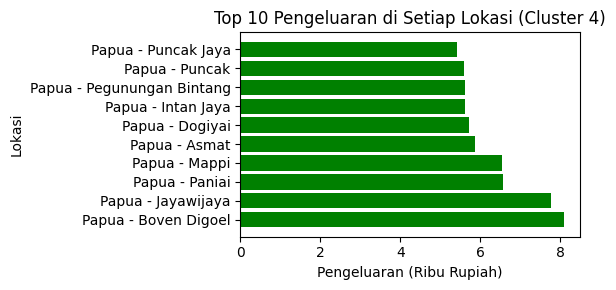

,Provinsi,Kota/Kabupaten,Pengeluaran (Ribu Rupiah)
9,Papua,Boven Digoel,8.086
1,Papua,Jayawijaya,7.765
6,Papua,Paniai,6.554
10,Papua,Mappi,6.550
11,Papua,Asmat,5.860


In [ ]:
# Visualisasi Pengeluaran
Top_c4 = cluster4.nlargest(10, 'Pengeluaran (Ribu Rupiah)')[['Provinsi', 'Kota/Kabupaten', 'Pengeluaran (Ribu Rupiah)']]
plt.figure(figsize=(6, 3))
plt.barh(Top_c4['Provinsi'] + ' - ' + Top_c4['Kota/Kabupaten'], Top_c4['Pengeluaran (Ribu Rupiah)'], color='green')
plt.ylabel('Lokasi')
plt.xlabel('Pengeluaran (Ribu Rupiah)')
plt.title('Top 10 Pengeluaran di Setiap Lokasi (Cluster 4)')
plt.tight_layout()
plt.show()

Top_c4.head()

###### **Rata rata dalam setiap variabel percluster**

In [ ]:
cols = ['UHH (Tahun)',"HLS (Tahun)", "RLS (Tahun)", "Pengeluaran (Ribu Rupiah)"]
df1.groupby('label')[cols].mean()

,UHH (Tahun),HLS (Tahun),RLS (Tahun),Pengeluaran (Ribu Rupiah)
label,,,,
0,71.185983,13.280940,8.915299,11515.247863
1,66.788851,12.955057,8.119195,7138.239575
2,67.843684,8.648947,13.115263,9384.105263
3,63.842222,9.070556,4.361667,5.596778


In [ ]:
df1.groupby('label')[cols].mean()

,UHH (Tahun),HLS (Tahun),RLS (Tahun),Pengeluaran (Ribu Rupiah)
label,,,,
0,71.185983,13.280940,8.915299,11515.247863
1,66.788851,12.955057,8.119195,7138.239575
2,67.843684,8.648947,13.115263,9384.105263
3,63.842222,9.070556,4.361667,5.596778


## **Evaluasi model**
Peneliti mengevaluasi model menggunakan metode silhouette score untuk melakukan evaluasi modelnya.

In [ ]:
def pseudo_f_score(X, labels):
    n_clusters = len(np.unique(labels))
    n_samples = X.shape[0]

    cluster_centers = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])
    overall_mean = X.mean(axis=0)

    ssb = np.sum([len(X[labels == i]) * np.sum((cluster_center - overall_mean) ** 2) for i, cluster_center in enumerate(cluster_centers)])
    ssw = np.sum([np.sum((X[labels == i] - cluster_center) ** 2) for i, cluster_center in enumerate(cluster_centers)])

    pseudo_f = (ssb / (n_clusters - 1)) / (ssw / (n_samples - n_clusters))
    return pseudo_f
def wcsse(X, labels):
    n_clusters = len(np.unique(labels))
    wcsse = np.sum([np.sum((X[labels == i] - X[labels == i].mean(axis=0)) ** 2) for i in range(n_clusters)])
    return wcsse
def intra_cluster_distance(X, labels):
    n_clusters = len(np.unique(labels))
    icd = np.mean([np.mean(pairwise_distances(X[labels == i])) for i in range(n_clusters)])
    return icd

###### **Evaluasi Model pada Data Normalisasi**
hasilnya sebesar 0.8299 merupakan hasil evalusasi model data yang bagus

In [ ]:
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
print("Silhouette Score:", silhouette_score(datanorm, label))
print("WCSSE:", wcsse(datanorm, label))
print("Calinski Harabasz Score:", calinski_harabasz_score(datanorm, label))
print("Davies-Bouldin Score:", davies_bouldin_score(datanorm, label))

Silhouette Score: 0.8299401121952718
WCSSE: 144.60187671602327
Calinski Harabasz Score: 4233.311507591212
Davies-Bouldin Score: 0.21564217029595067


In [ ]:
print("Pseudo F Score:", pseudo_f_score(datanorm, label))
print("WCSSE:", wcsse(datanorm, label))
print("Intra-Cluster Distance Rate:", intra_cluster_distance(datanorm, label))
print("Silhouette Score:", silhouette_score(datanorm, label))

Pseudo F Score: 4233.311113041593
WCSSE: 144.60187671602327
Intra-Cluster Distance Rate: 0.6127900357805626
Silhouette Score: 0.8299401121952718


###### **Evaluasi Model pada Data Sebelum Normalisasi**
hasilnya dari silhoutte score 0.634 yang mana lebih kecil dari model data setelah transformasi

In [ ]:
# training menggunakan dataset sebelum normalisasi
from sklearn.cluster import KMeans
k_means = KMeans()
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=5,random_state=3)
kmeans.fit(df_atribut)
label2 = kmeans.fit_predict(df_atribut)

# Evaluasi model
print("Pseudo F Score:", pseudo_f_score(df_atribut, label2))
print("WCSSE:", wcsse(df_atribut, label2))
print("Intra-Cluster Distance Rate:", intra_cluster_distance(df_atribut, label2))
print("Silhouette Score:", silhouette_score(df_atribut, label2))

Metode Clustering K-Means sangat dipengaruhi oleh outlier karena dapat mempengaruhi posisi centroid cluster. Saat data telah dinormalisasi dapat mengurangi pengaruh outlier, sehingga hasil clustering bisa berbeda dan mungkin tidak sebaik hasil pada data yang tidak dinormalisasikan menurut metrik tertentu seperti skor Silhouette.